## First import the cleaned coins generated in R dplyr & CryptoDRGDataClean notebook

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.listdir('/home/cynthiaorourke/Documents/Data')

['wine_data.csv',
 'WeekEight2015_18.csv',
 'Crunchbase_Startup_Investment_Data.csv',
 'coins23.csv',
 'headsupwinedata.zip',
 'xmr.csv',
 'crypto-markets (1).csv',
 'cleaned_coins.csv',
 'Final2015_18.csv',
 'btc.csv',
 'full_coins.csv']

In [4]:
coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/cleaned_coins.csv', header = 0)
print(coins.dtypes)
print(coins.iloc[0:10,:])

Unnamed: 0           int64
slug                object
symbol              object
name                object
date                object
ranknow              int64
open               float64
high               float64
low                float64
close              float64
volume               int64
market               int64
close_ratio        float64
spread             float64
bitcoin_open       float64
coin_to_bitcoin    float64
open_to_open       float64
dtype: object
   Unnamed: 0     slug symbol     name        date  ranknow    open    high  \
0           0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98   
1           1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49   
2           2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93   
3           3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89   
4           4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   
5           5  bitcoin    BTC  Bitcoin  2013-05-03   

## Updates from meeting with Maria 20190124

## Focal metric: % momentum - when coin A goes from 10,000:btc to 20,000:btc, does coin B go from 1:btc to 2:btc? 

## Question 1: When does a given altcoin diverge in its steady-state relationship to bitcoin? Under what market regimes? The regime definition is for EC; the dates and nature of divergence pin-pointing is for me. [That's done.]

## Question 2: Given that most altcoins have a steady-state value ratio to bitcoin, which altcoins share their divergence dates from that steady state? Which altcoins covary in altcoin:btc ratio?

## Question 3: Under what market regimes do these divergences happen? Once again, pin-pointing the dates and nature of divergences is for me.

## Question 4: During what periods of time are altcoin clusters themselves disrupted? What do those cluster disruptions look like - cluster dissolution, cluster fragmentation, even cluster tightening? 

In [5]:
#date_as_date is back to an object
coins['date_as_date'] =  pd.to_datetime(coins['date'], format='%Y-%m-%d')
print(coins.dtypes)
print(coins.iloc[0:10,17])
#fixed

Unnamed: 0                  int64
slug                       object
symbol                     object
name                       object
date                       object
ranknow                     int64
open                      float64
high                      float64
low                       float64
close                     float64
volume                      int64
market                      int64
close_ratio               float64
spread                    float64
bitcoin_open              float64
coin_to_bitcoin           float64
open_to_open              float64
date_as_date       datetime64[ns]
dtype: object
0   2013-04-28
1   2013-04-29
2   2013-04-30
3   2013-05-01
4   2013-05-02
5   2013-05-03
6   2013-05-04
7   2013-05-05
8   2013-05-06
9   2013-05-07
Name: date_as_date, dtype: datetime64[ns]


In [6]:
#need to drop that extra index column that was created during dplyr munging
coins.drop(coins.columns[0], axis=1, inplace=True)
print('now without that extra index')
print(coins.iloc[0:10,:])

now without that extra index
      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   
5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   79.10   
6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   92.50   
7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80  107.14   
8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66  106.64   
9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   97.70   

    close  volume      market  close_ratio  spread  bitcoin_open  \
0  134.21       0  1488566728     0.543814    3.88        135.30   
1  144.54

In [7]:
#define a new column - classic financial "ROC" - the percent rate of change over time
#it's the proportion change version of open_to_open:
#if a coin worth $10,000 moves to $20,000 and a coin worth $1 moves to $2 in one day, they have = ROCs for that day
#[price] ROC = (new_coin_value - prev_coin_value)/(prev_coin_value)
#where value is ratio_to_bitcoin
#there are other financial ways to define ROC, but from what I've seen they're all versions of this that differ...
#... by orders of magnitude only
coins['ROC']=(coins['coin_to_bitcoin']-coins['coin_to_bitcoin'].shift(1))/coins['coin_to_bitcoin'].shift(1)
print(coins.iloc[0:10,:]) #good - zero for bitcoin itself, as it should be
print(coins.iloc[2090:2096,:]) #correct border issues - first measure is based on last measure of prev altcoin
print(coins.iloc[-158:-150,:])

      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   
5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   79.10   
6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   92.50   
7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80  107.14   
8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66  106.64   
9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   97.70   

    close  volume      market  close_ratio  spread  bitcoin_open  \
0  134.21       0  1488566728     0.543814    3.88        135.30   
1  144.54       0  1603768865     0.78

In [8]:
#This takes a while to run:
#Later proves unnecessary when above replaced by .rolling arguments
for i in coins.index:
    if coins.iloc[i,0]!=coins.iloc[i-1,0]:
        coins.loc[coins.index==i,'open_to_open'] = 0
        coins.loc[coins.index==i,'ROC'] = 0
print(coins.iloc[2090:2096,:]) 
print(coins.iloc[-158:-150,:])
#correct border issues - first measure is based on last measure of prev altcoin

         slug symbol     name        date  ranknow         open         high  \
2090  bitcoin    BTC  Bitcoin  2019-01-17        1  3651.870000  3680.140000   
2091  bitcoin    BTC  Bitcoin  2019-01-18        1  3677.990000  3682.520000   
2092  bitcoin    BTC  Bitcoin  2019-01-19        1  3652.380000  3758.530000   
2093   ripple    XRP      XRP  2013-08-04        2     0.005874     0.005927   
2094   ripple    XRP      XRP  2013-08-05        2     0.005875     0.005980   
2095   ripple    XRP      XRP  2013-08-06        2     0.005637     0.005661   

              low        close      volume       market  close_ratio  spread  \
2090  3621.960000  3678.560000  5464420383  64327048255     0.972843   58.18   
2091  3637.080000  3657.840000  5002961727  63970991867     0.456866   45.44   
2092  3652.380000  3728.570000  5955691380  65214103659     0.717758  106.15   
2093     0.005874     0.005882           0     45983577     0.080000    0.00   
2094     0.005613     0.005613         

In [9]:
print(coins.iloc[0:10,:]) #good - zero for bitcoin itself, as it should be
print(coins.iloc[2090:2096,:]) 
print(coins.iloc[-158:-150,:])
#ok, that problem is fixed

      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   
5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   79.10   
6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   92.50   
7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80  107.14   
8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66  106.64   
9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   97.70   

    close  volume      market  close_ratio  spread  bitcoin_open  \
0  134.21       0  1488566728     0.543814    3.88        135.30   
1  144.54       0  1603768865     0.78

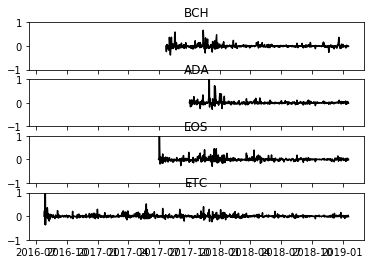

In [10]:
#[price] ROC = (new_coin_value - prev_coin_value)/(prev_coin_value)
#plotting ROC:

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['ROC'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['ROC'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['ROC'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['ROC'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

#plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
plt.ylim(-1,1) 
plt.show()


#that looks great! there's a steady state for each coin, but theoretic bounds of ROC are -infinity <--> +infinity
#so visually, these things are not directly comparable between coins without constraining ylims
#however, a transformation would not be desired here - prop change vs. prop change is what we want

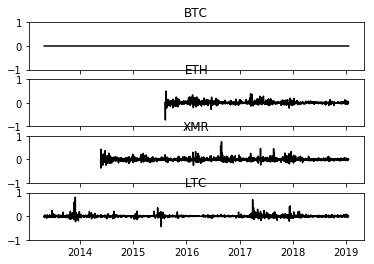

In [11]:
#ROC sanity check:

a = 'BTC'#should be flat
b = 'ETH'#shouldn't hover around zero
c = 'XMR'#shouldn't hover around zero
d = 'LTC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['ROC'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['ROC'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['ROC'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['ROC'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

#plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
plt.ylim(-1,1) 
plt.show()


#that looks great! there's a steady state for each coin, but theoretic bounds of ROC are -infinity <--> +infinity
#so visually, these things are not directly comparable between coins without constraining ylims
#however, a transformation would not be desired here - prop change vs. prop change is what we want

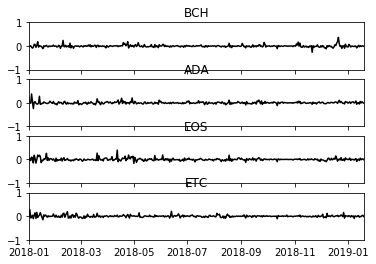

In [12]:
#[price] ROC = (new_coin_value - prev_coin_value)/(prev_coin_value)
#zooming in on ROC plot:

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['ROC'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['ROC'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['ROC'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['ROC'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2018-01-01', '2019-01-19') #adjusting start date for better resolution
plt.ylim(-1,1) 
plt.show()


#that looks great! there's a steady state for each coin, but theoretic bounds of ROC are -infinity <--> +infinity
#so visually, these things are not directly comparable between coins without constraining ylims
#however, a transformation would not be desired here - prop change vs. prop change is what we want

In [14]:
#this takes a little while to run
#1st, need a pair of coins - let's take BCH and ADA, which visually at least strongly covary in coin_to_bitcoin
#use minmax_open (normalized open raw values), because I can visually see that the correlation is good there
#start by generating a distance matrix between all coins that are extant on the last day of sampling: 20190120

import scipy.spatial.distance
from scipy.spatial.distance import pdist, squareform

x = coins.ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = coins.ROC[(coins['date_as_date']=='2019-01-19')].values
print(x.shape)
print(y.shape) 

#then that np array has to be made 2d before pdist will eat it:
y[:, np.newaxis]

#then calculate a flat distance matrix for it:
distances = pdist(y[:, np.newaxis], metric='euclidean')

#then make that distance matrix square:
dist_matrix = squareform(distances)
print(dist_matrix)

#now go back and make it a pandas df with names running the header and rows:
names = [_ for _ in coins.name[(coins['date_as_date']=='2019-01-19')]]
df = pd.DataFrame(dist_matrix, index=names, columns=names)
df.to_csv('df.csv', index=True, header=True, sep=' ')
print(df)

#ok, that's going to be SUPER useful for later, when it comes to tracking the changes in these distances...
#... over time as per Rubab's suggestion, but this is actually further than you need to go for k-medoids/k-means

(1026980,)
(2116,)
[[0.00000000e+00 3.67629359e-03 9.60199715e-03 ... 7.01186624e-03
  7.01186624e-03 7.01186624e-03]
 [3.67629359e-03 0.00000000e+00 5.92570356e-03 ... 1.06881598e-02
  1.06881598e-02 1.06881598e-02]
 [9.60199715e-03 5.92570356e-03 0.00000000e+00 ... 1.66138634e-02
  1.66138634e-02 1.66138634e-02]
 ...
 [7.01186624e-03 1.06881598e-02 1.66138634e-02 ... 0.00000000e+00
  2.51534904e-16 2.76688394e-16]
 [7.01186624e-03 1.06881598e-02 1.66138634e-02 ... 2.51534904e-16
  0.00000000e+00 5.28223298e-16]
 [7.01186624e-03 1.06881598e-02 1.66138634e-02 ... 2.76688394e-16
  5.28223298e-16 0.00000000e+00]]
                     Bitcoin       XRP  Ethereum  Bitcoin Cash       EOS  \
Bitcoin             0.000000  0.003676  0.009602      0.012500  0.012969   
XRP                 0.003676  0.000000  0.005926      0.008824  0.009292   
Ethereum            0.009602  0.005926  0.000000      0.002898  0.003367   
Bitcoin Cash        0.012500  0.008824  0.002898      0.000000  0.000469   
E

In [15]:
#Ok, that's one ROC distance matrix for a given day, but Maria specifically requested longer periods of time
#let's try week, month, and quarter ROC values... ooooh, but a simple .shift() won't do it here
#we'll need calendar-dictated periods of time... but that's a bit hard, because the percent change over a week...
#... is neither the average nor sum of daily ROCs, and caution needs to be made when comparing ROC values btwn...
#... coins that have incomplete entries for a given time periods

#ok, what time period? quarters are too big relative to the history of these coins
#weeks and months are likely candidates
#let's do a count of weeks in order, to create a fixed "week" value between altcoins
#oh hey there are functions for this, based on the calendar:

coins['week'] = coins['date_as_date'].dt.week
coins['year'] = coins['date_as_date'].dt.year
coins['month'] = coins['date_as_date'].dt.month
print(coins.iloc[2090:2096,:]) 
print(coins.iloc[-158:-150,:])

#next, calculate the ROC for each of these coins over each of these time periods

         slug symbol     name        date  ranknow         open         high  \
2090  bitcoin    BTC  Bitcoin  2019-01-17        1  3651.870000  3680.140000   
2091  bitcoin    BTC  Bitcoin  2019-01-18        1  3677.990000  3682.520000   
2092  bitcoin    BTC  Bitcoin  2019-01-19        1  3652.380000  3758.530000   
2093   ripple    XRP      XRP  2013-08-04        2     0.005874     0.005927   
2094   ripple    XRP      XRP  2013-08-05        2     0.005875     0.005980   
2095   ripple    XRP      XRP  2013-08-06        2     0.005637     0.005661   

              low        close      volume  ...    close_ratio  spread  \
2090  3621.960000  3678.560000  5464420383  ...       0.972843   58.18   
2091  3637.080000  3657.840000  5002961727  ...       0.456866   45.44   
2092  3652.380000  3728.570000  5955691380  ...       0.717758  106.15   
2093     0.005874     0.005882           0  ...       0.080000    0.00   
2094     0.005613     0.005613           0  ...       0.000000    0.0

In [16]:
#now having fixed weeks, months, and years, calculate ROC over these time periods, being wary of boundaries
#actually makes sense to keep these rolling, and sample for comparions by pairing specific dates between coins
#reminder: [price] ROC = (new_coin_value - prev_coin_value)/(prev_coin_value)
coins['weekly_ROC']=(coins['coin_to_bitcoin']-coins['coin_to_bitcoin'].shift(7))/coins['coin_to_bitcoin'].shift(7)
coins['4week_ROC']=(coins['coin_to_bitcoin']-coins['coin_to_bitcoin'].shift(28))/coins['coin_to_bitcoin'].shift(28)
print(coins.iloc[0:10,:]) #good - zero for bitcoin itself, as it should be
print(coins.iloc[2090:2096,:]) 
print(coins.iloc[-158:-150,:])
#correct border issues - first measure is based on last measure of prev altcoin

      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   
5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   79.10   
6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   92.50   
7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80  107.14   
8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66  106.64   
9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   97.70   

    close  volume    ...      bitcoin_open  coin_to_bitcoin  open_to_open  \
0  134.21       0    ...            135.30              1.0  0.000000e+00   
1  144.54       0   

In [17]:
#whoof, one at a time - these for loops take a whiiiile to run

for i in coins.index:
    if coins.iloc[i,0]!=coins.iloc[i-7,0]:
        coins.loc[coins.index==i,'weekly_ROC'] = 0
#     if coins.iloc[i,0]!=coins.iloc[i-28,0]:
#         coins.loc[coins.index==i,'4week_ROC'] = 0

In [18]:
print(coins.iloc[0:10,:])
print(coins.iloc[2090:2096,:]) 
print(coins.iloc[-158:,:])

#the good news is it worked!

      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   
5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   79.10   
6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   92.50   
7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80  107.14   
8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66  106.64   
9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   97.70   

    close  volume    ...      bitcoin_open  coin_to_bitcoin  open_to_open  \
0  134.21       0    ...            135.30              1.0  0.000000e+00   
1  144.54       0   

In [19]:
#now clean up the months:

for i in coins.index:
    if coins.iloc[i,0]!=coins.iloc[i-28,0]:
        coins.loc[coins.index==i,'4week_ROC'] = 0

In [20]:
print(coins.iloc[2090:2125,[1,-3,-2,-1]]) 
print(coins.iloc[-158:-120,[1,-3,-2,-1]])

#the second fix worked too!

     symbol  month  weekly_ROC  4week_ROC
2090    BTC      1    0.000000   0.000000
2091    BTC      1    0.000000   0.000000
2092    BTC      1    0.000000   0.000000
2093    XRP      8    0.000000   0.000000
2094    XRP      8    0.000000   0.000000
2095    XRP      8    0.000000   0.000000
2096    XRP      8    0.000000   0.000000
2097    XRP      8    0.000000   0.000000
2098    XRP      8    0.000000   0.000000
2099    XRP      8    0.000000   0.000000
2100    XRP      8   -0.251673   0.000000
2101    XRP      8   -0.247822   0.000000
2102    XRP      8   -0.210265   0.000000
2103    XRP      8   -0.109540   0.000000
2104    XRP      8   -0.182971   0.000000
2105    XRP      8   -0.321627   0.000000
2106    XRP      8   -0.310235   0.000000
2107    XRP      8    0.204270   0.000000
2108    XRP      8    0.172193   0.000000
2109    XRP      8    0.083000   0.000000
2110    XRP      8    0.291750   0.000000
2111    XRP      8    0.477551   0.000000
2112    XRP      8    0.515117   0

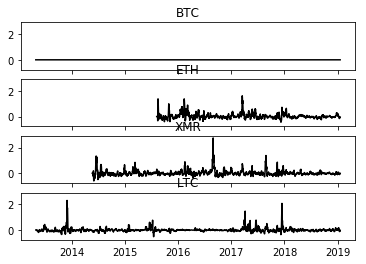

In [21]:
#let's look at this new weekly ROC:

a = 'BTC'#should be flat
b = 'ETH'#shouldn't hover around zero
c = 'XMR'#shouldn't hover around zero
d = 'LTC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['weekly_ROC'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['weekly_ROC'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['weekly_ROC'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['weekly_ROC'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

#plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
# plt.ylim(-1,1) 
plt.show()

#that is much smoother than daily ROC... should be less computationally expensive to process, too
#however, what I really need to is plot each weekly ROC only at one set weekday within that period...
#... for example say the first day's weekly_ROC values only 

## Note: GroupBy is almost unreversible in pandas. Avoid at all costs, unless created new SEPARATELY NAMED object when grouping. 

In [22]:
#never use group
coins['month_start'] = coins['date_as_date'].dt.is_month_start
coins['week_start'] = coins['date_as_date'].dt.dayofweek
# now I have a boolean column with "true" only where the date is the start of the month
# and a column describing weekday (so set == 1 or whatever constant)

In [23]:
monthly_coins = coins[(coins['month_start']==True)]
monthly_coins

,slug,symbol,name,date,ranknow,open,high,low,close,volume,...,open_to_open,date_as_date,ROC,week,year,month,weekly_ROC,4week_ROC,month_start,week_start
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0,...,0.000000e+00,2013-05-01,0.000000,18,2013,5,0.000000,0.000000,True,2
34,bitcoin,BTC,Bitcoin,2013-06-01,1,128.820000,129.780000,127.200000,129.300000,0,...,0.000000e+00,2013-06-01,0.000000,22,2013,6,0.000000,0.000000,True,5
64,bitcoin,BTC,Bitcoin,2013-07-01,1,97.510000,97.660000,86.300000,88.050000,0,...,0.000000e+00,2013-07-01,0.000000,27,2013,7,0.000000,0.000000,True,0
95,bitcoin,BTC,Bitcoin,2013-08-01,1,106.210000,108.000000,103.010000,104.000000,0,...,0.000000e+00,2013-08-01,0.000000,31,2013,8,0.000000,0.000000,True,3
126,bitcoin,BTC,Bitcoin,2013-09-01,1,135.140000,145.810000,134.810000,138.340000,0,...,0.000000e+00,2013-09-01,0.000000,35,2013,9,0.000000,0.000000,True,6
156,bitcoin,BTC,Bitcoin,2013-10-01,1,132.680000,134.630000,131.550000,132.180000,0,...,0.000000e+00,2013-10-01,0.000000,40,2013,10,0.000000,0.000000,True,1
187,bitcoin,BTC,Bitcoin,2013-11-01,1,203.900000,206.650000,202.130000,206.180000,0,...,1.110223e-16,2013-11-01,0.000000,44,2013,11,0.000000,0.000000,True,4
217,bitcoin,BTC,Bitcoin,2013-12-01,1,1128.920000,1133.080000,801.820000,955.850000,0,...,0.000000e+00,2013-12-01,0.000000,48,2013,12,0.000000,0.000000,True,6
248,bitcoin,BTC,Bitcoin,2014-01-01,1,754.970000,775.350000,754.970000,771.400000,22489400,...,0.000000e+00,2014-01-01,0.000000,1,2014,1,0.000000,0.000000,True,2
279,bitcoin,BTC,Bitcoin,2014-02-01,1,828.610000,853.520000,827.110000,832.580000,19668700,...,0.000000e+00,2014-02-01,0.000000,5,2014,2,0.000000,0.000000,True,5


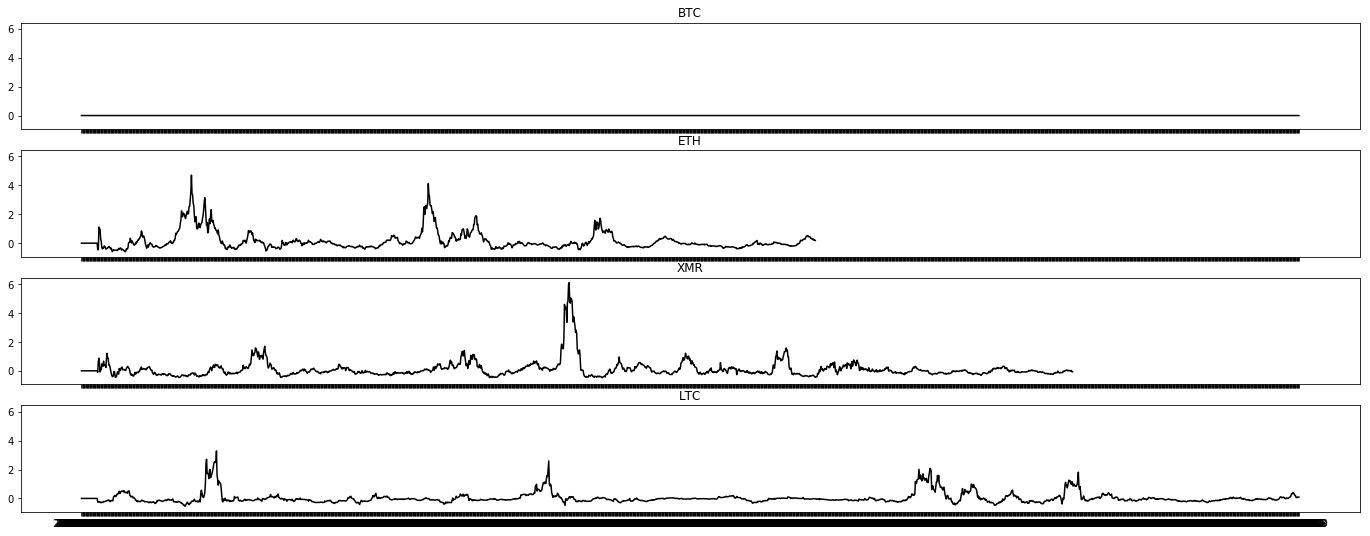

In [11]:
#let's look at this new weekly ROC:
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a = 'BTC'#should be flat
b = 'ETH'#shouldn't hover around zero
c = 'XMR'#shouldn't hover around zero
d = 'LTC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['4week_ROC'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['4week_ROC'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['4week_ROC'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['4week_ROC'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

#plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
# plt.ylim(-1,1) 
plt.show()

#that is much smoother than daily ROC... should be less computationally expensive to process, too
#however, what I really need to is plot each weekly ROC only at one set weekday within that period...
#... for example say the first day's weekly_ROC values only 

In [25]:
weekly_coins = coins[(coins['week_start']==1)]
weekly_coins

,slug,symbol,name,date,ranknow,open,high,low,close,volume,...,open_to_open,date_as_date,ROC,week,year,month,weekly_ROC,4week_ROC,month_start,week_start
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0,...,0.000000e+00,2013-04-30,0.000000,18,2013,4,0.000000,0.000000,False,1
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.250000,113.440000,97.700000,111.500000,0,...,0.000000e+00,2013-05-07,0.000000,19,2013,5,0.000000,0.000000,False,1
16,bitcoin,BTC,Bitcoin,2013-05-14,1,117.980000,119.800000,110.250000,111.500000,0,...,0.000000e+00,2013-05-14,0.000000,20,2013,5,0.000000,0.000000,False,1
23,bitcoin,BTC,Bitcoin,2013-05-21,1,122.020000,123.000000,121.210000,122.880000,0,...,0.000000e+00,2013-05-21,0.000000,21,2013,5,0.000000,0.000000,False,1
30,bitcoin,BTC,Bitcoin,2013-05-28,1,129.770000,130.580000,125.600000,129.000000,0,...,0.000000e+00,2013-05-28,0.000000,22,2013,5,0.000000,0.000000,False,1
37,bitcoin,BTC,Bitcoin,2013-06-04,1,120.740000,123.840000,119.100000,121.420000,0,...,0.000000e+00,2013-06-04,0.000000,23,2013,6,0.000000,0.000000,False,1
44,bitcoin,BTC,Bitcoin,2013-06-11,1,106.350000,109.600000,104.000000,108.900000,0,...,0.000000e+00,2013-06-11,0.000000,24,2013,6,0.000000,0.000000,False,1
51,bitcoin,BTC,Bitcoin,2013-06-18,1,101.950000,111.110000,101.030000,107.400000,0,...,0.000000e+00,2013-06-18,0.000000,25,2013,6,0.000000,0.000000,False,1
58,bitcoin,BTC,Bitcoin,2013-06-25,1,102.090000,106.470000,101.010000,103.950000,0,...,0.000000e+00,2013-06-25,0.000000,26,2013,6,0.000000,0.000000,False,1
65,bitcoin,BTC,Bitcoin,2013-07-02,1,88.050000,92.300000,87.510000,90.130000,0,...,0.000000e+00,2013-07-02,0.000000,27,2013,7,0.000000,0.000000,False,1


In [105]:
## Let's take a moment to export the daily, weekly, and monthly ROC dataframes both for R Shiny use and...
#... for safe-keeping in the face of groupby disasters and kernel meltdowns
coins.to_csv('/home/cynthiaorourke/Documents/Data/coins.csv', sep=',', encoding='utf-8')
monthly_coins.to_csv('/home/cynthiaorourke/Documents/Data/monthly_coins.csv', sep=',', encoding='utf-8')
weekly_coins.to_csv('/home/cynthiaorourke/Documents/Data/weekly_coins.csv', sep=',', encoding='utf-8')
working_coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/coins.csv', header = 0)

   Unnamed: 0     slug symbol     name        date  ranknow    open    high  \
0           0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98   
1           1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49   
2           2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93   
3           3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89   
4           4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   
5           5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   
6           6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   
7           7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80   
8           8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66   
9           9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   

      low   close     ...      open_to_open  date_as_date  ROC  week  year  \
0  132.10  134.21     ...      0.000000e+00    2013-

## This is where you can pull your processed data back out again
## reminder: [price] ROC = (new_coin_value - prev_coin_value)/(prev_coin_value)

In [1]:
#but also reimport all necessary modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/coins.csv', header = 0)
coins.drop(coins.columns[0], axis=1, inplace=True)
print(coins.iloc[0:10,:])
weekly_coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/weekly_coins.csv', header = 0)
weekly_coins.drop(weekly_coins.columns[0], axis=1, inplace=True)
print(weekly_coins.iloc[0:10,:])
monthly_coins = pd.read_csv('/home/cynthiaorourke/Documents/Data/monthly_coins.csv', header = 0)
monthly_coins.drop(monthly_coins.columns[0], axis=1, inplace=True)
print(monthly_coins.iloc[0:10,:])
coins['date_as_date'] =  pd.to_datetime(coins['date'], format='%Y-%m-%d')
weekly_coins['date_as_date'] =  pd.to_datetime(weekly_coins['date'], format='%Y-%m-%d')
monthly_coins['date_as_date'] =  pd.to_datetime(monthly_coins['date'], format='%Y-%m-%d')

      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   
5  bitcoin    BTC  Bitcoin  2013-05-03        1  106.25  108.13   79.10   
6  bitcoin    BTC  Bitcoin  2013-05-04        1   98.10  115.00   92.50   
7  bitcoin    BTC  Bitcoin  2013-05-05        1  112.90  118.80  107.14   
8  bitcoin    BTC  Bitcoin  2013-05-06        1  115.98  124.66  106.64   
9  bitcoin    BTC  Bitcoin  2013-05-07        1  112.25  113.44   97.70   

    close  volume     ...      open_to_open  date_as_date  ROC  week  year  \
0  134.21       0     ...      0.000000e+00    2013-04-28  0.0    17  2013   
1  144.54       0 

In [4]:
#so the dates match from date to date_as_date on these spreadsheets, but somehow the sequence is being reversed
#... in the plots
print(monthly_coins.dtypes)
monthly_coins['date_as_date'] =  pd.to_datetime(monthly_coins['date'], format='%Y-%m-%d')
print(monthly_coins.dtypes)

slug                object
symbol              object
name                object
date                object
ranknow              int64
open               float64
high               float64
low                float64
close              float64
volume               int64
market               int64
close_ratio        float64
spread             float64
bitcoin_open       float64
coin_to_bitcoin    float64
open_to_open       float64
date_as_date        object
ROC                float64
week                 int64
year                 int64
month                int64
weekly_ROC         float64
4week_ROC          float64
month_start           bool
week_start           int64
fourweek_ROC       float64
dtype: object
slug                       object
symbol                     object
name                       object
date                       object
ranknow                     int64
open                      float64
high                      float64
low                       float64
close       

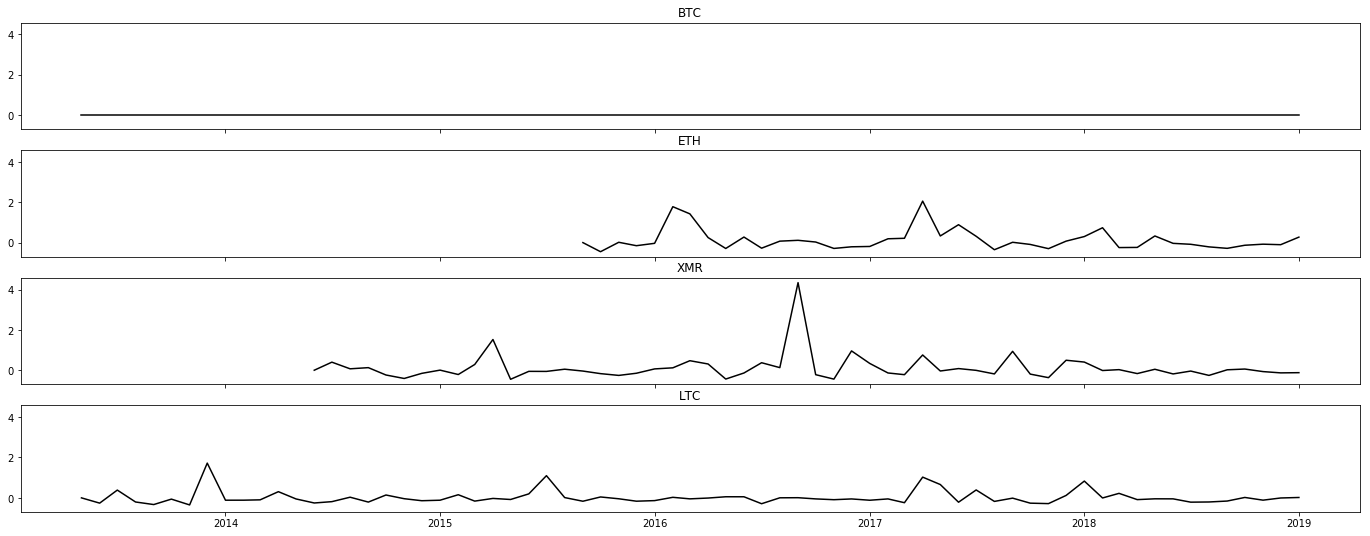

In [7]:
#let's look at monthly ROC, and fix the params at a nice point while we're here:

width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a = 'BTC'#should be flat
b = 'ETH'
c = 'XMR'
d = 'LTC'

x1=monthly_coins['date_as_date'][(monthly_coins['symbol'] == a)]
y1=monthly_coins['fourweek_ROC'][(monthly_coins['symbol'] == a)]

x2=monthly_coins['date_as_date'][(monthly_coins['symbol'] == b)]
y2=monthly_coins['fourweek_ROC'][(monthly_coins['symbol'] == b)]

x3=monthly_coins['date_as_date'][(monthly_coins['symbol'] == c)]
y3=monthly_coins['fourweek_ROC'][(monthly_coins['symbol'] == c)]

x4=monthly_coins['date_as_date'][(monthly_coins['symbol'] == d)]
y4=monthly_coins['fourweek_ROC'][(monthly_coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

#plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
# plt.ylim(-1,1) 
## temporary bug fix for that inverted x-axis:
##ax = plt.gca()
##ax.invert_xaxis()
plt.show()

#ok, rewriting date_as_date in datetime format has fixed that bug, good - go back and include that in the...
#... csv-load script

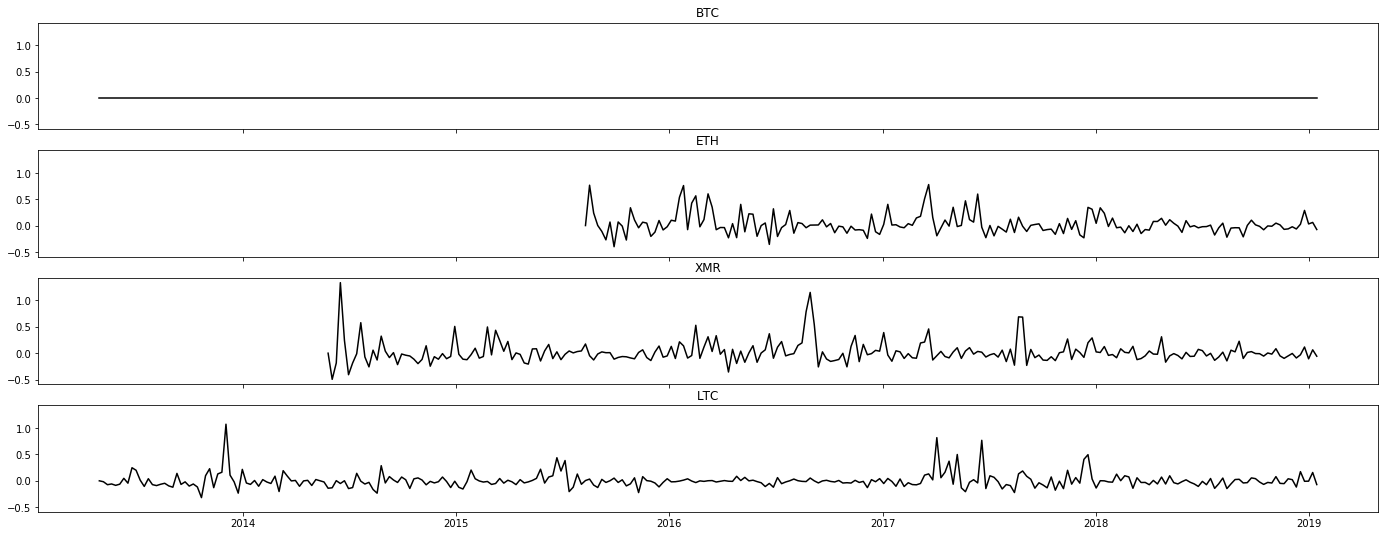

In [8]:
#let's look at this new weekly ROC:

a = 'BTC'#should be flat
b = 'ETH'
c = 'XMR'
d = 'LTC'

x1=weekly_coins['date_as_date'][(weekly_coins['symbol'] == a)]
y1=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == a)]

x2=weekly_coins['date_as_date'][(weekly_coins['symbol'] == b)]
y2=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == b)]

x3=weekly_coins['date_as_date'][(weekly_coins['symbol'] == c)]
y3=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == c)]

x4=weekly_coins['date_as_date'][(weekly_coins['symbol'] == d)]
y4=weekly_coins['weekly_ROC'][(weekly_coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True, sharey=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.show()

## Is there any information captured in the distance matrix that is not captured by a simple coinA_ROC-coinB_ROC approach? Let's subset the list of coins to efficiently check that out.

In [15]:
a = 'BTC'#should be flat
b = 'ETH'
c = 'XMR'
d = 'LTC'
subset_coins=monthly_coins[(monthly_coins['symbol'] == b)|(monthly_coins['symbol'] == c)|(monthly_coins['symbol'] == d)]
print(subset_coins.shape)
print(subset_coins.iloc[0:5,:])
print(subset_coins.iloc[161:165,:])

(166, 26)
         slug symbol      name        date  ranknow      open      high  \
134  ethereum    ETH  Ethereum  2015-09-01        3  1.350000  1.390000   
135  ethereum    ETH  Ethereum  2015-10-01        3  0.734307  0.734307   
136  ethereum    ETH  Ethereum  2015-11-01        3  0.920847  1.080000   
137  ethereum    ETH  Ethereum  2015-12-01        3  0.878316  0.886736   
138  ethereum    ETH  Ethereum  2016-01-01        3  0.933712  0.954822   

          low     close  volume      ...       date_as_date       ROC  week  \
134  1.340000  1.350000  778862      ...         2015-09-01  0.017619    36   
135  0.655906  0.690215  596084      ...         2015-10-01  0.113592    40   
136  0.899082  1.060000  588913      ...         2015-11-01 -0.085418    44   
137  0.853937  0.874800  652857      ...         2015-12-01 -0.017647    49   
138  0.931442  0.948024  206062      ...         2016-01-01  0.012194    53   

     year  month  weekly_ROC 4week_ROC  month_start  week_start 

In [31]:
import scipy.spatial.distance
from scipy.spatial.distance import pdist, squareform

x = subset_coins.fourweek_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = subset_coins.fourweek_ROC[(monthly_coins['date_as_date']=='2019-01-01')].values
print(x.shape)
print(y.shape) 

#then that np array has to be made 2d before pdist will eat it:
y[:, np.newaxis]

#then calculate a flat distance matrix for it:
distances = pdist(y[:, np.newaxis], metric='euclidean')

#then make that distance matrix square:
dist_matrix = squareform(distances)

#now go back and make it a pandas df with names running the header and rows:
names = [_ for _ in subset_coins.slug[(subset_coins['date_as_date']=='2019-01-01')]]
df = pd.DataFrame(dist_matrix, index=names, columns=names)
df.to_csv('df.csv', index=True, header=True, sep=' ')
print(df)

print(subset_coins.iloc[:,[2,25]][(subset_coins['date_as_date']=='2019-01-01')])
print('eth-ltc=',0.271971-0.018857)
print('eth-xmr=',0.271971+0.120787)
print('ltc-xmr=',0.018857+0.120787)
print('Looks like there\'s no added value past that first row of comparisons')

(166,)
(3,)
          ethereum  litecoin    monero
ethereum  0.000000  0.253114  0.392758
litecoin  0.253114  0.000000  0.139644
monero    0.392758  0.139644  0.000000
         name  fourweek_ROC
174  Ethereum      0.271971
379  Litecoin      0.018857
506    Monero     -0.120787
eth-ltc= 0.253114
eth-xmr= 0.39275800000000005
ltc-xmr= 0.139644


## A distance matrix may not be the way to go, because whether the distance is negative or positive is valuable information, particularly when coins cross ROC values (the lower-ROC one of the pair becomes the higher-ROC one of the pair)

## Just monthly/weekly/daily coinA_ROC-coinB_ROC is probably better, so long as the algorithm can handle negative values

In [74]:
#First proof this hand-built sign-included distance matrix with that subset of coins:
x = subset_coins.fourweek_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = subset_coins.fourweek_ROC[(monthly_coins['date_as_date']=='2019-01-01')].values
print(x.shape)
print(y.shape) 

#then that np array has to be made 2d before pdist will eat it:
y[:, np.newaxis]
print('shape of y is apparently unchanged, tho:',y.shape)
yT=np.reshape(y,(1,3))

print(yT)
print(y) #ok, that worked - yT is a row, not a column
y=np.reshape(y,(3,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained!
print(subtractions,subtractions.shape)

names = [_ for _ in subset_coins.slug[(subset_coins['date_as_date']=='2019-01-01')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

(166,)
(3,)
shape of y is apparently unchanged, tho: (3,)
[[ 0.27197087  0.01885706 -0.12078744]]
[ 0.27197087  0.01885706 -0.12078744]
[[ 0.          0.25311382  0.39275831]
 [-0.25311382  0.          0.13964449]
 [-0.39275831 -0.13964449  0.        ]] (3, 3)
          ethereum  litecoin    monero
ethereum  0.000000  0.253114  0.392758
litecoin -0.253114  0.000000  0.139644
monero   -0.392758 -0.139644  0.000000


In [77]:
#now with the full monthly coins set, snap-shotted as one day (one month) of comparisons:

x = monthly_coins.fourweek_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = monthly_coins.fourweek_ROC[(monthly_coins['date_as_date']=='2019-01-01')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach
print(subtractions,subtractions.shape)

names = [_ for _ in monthly_coins.slug[(monthly_coins['date_as_date']=='2019-01-01')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#ok, so that does the right thing, but is it necessarily the best way to go about extracting a vector of....
#... every coin's relationship to every other coin over time? 
#for one thing, the sizes and coordinates of these distance matrices will change...
#... as coins blip in and out of existance
#good to have the code for a more representative snapshot of distance on hand, though
#might come in handy later

2064
[[ 0.         -0.04909274 -0.27197087 ...  0.2155087   0.32936163
   0.45215457]
 [ 0.04909274  0.         -0.22287814 ...  0.26460144  0.37845436
   0.50124731]
 [ 0.27197087  0.22287814  0.         ...  0.48747957  0.6013325
   0.72412544]
 ...
 [-0.2155087  -0.26460144 -0.48747957 ...  0.          0.11385293
   0.23664587]
 [-0.32936163 -0.37845436 -0.6013325  ... -0.11385293  0.
   0.12279294]
 [-0.45215457 -0.50124731 -0.72412544 ... -0.23664587 -0.12279294
   0.        ]] (2064, 2064)
                          bitcoin    ripple  ethereum  bitcoin-cash       eos  \
bitcoin                  0.000000 -0.049093 -0.271971      0.019534 -0.029244   
ripple                   0.049093  0.000000 -0.222878      0.068626  0.019848   
ethereum                 0.271971  0.222878  0.000000      0.291505  0.242727   
bitcoin-cash            -0.019534 -0.068626 -0.291505      0.000000 -0.048778   
eos                      0.029244 -0.019848 -0.242727      0.048778  0.000000   
tether       

In [381]:
#can I pick the closest coins out for any given coin above?
pd.set_option('precision',7)

print(subtraction_matrix.shape)
abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,' but keeps ranks sequential by i,i+1,i+2, etc.
print(rank_abs_mins)
print('.at['',''] method=',rank_abs_mins.at['bitcoin','ethereum'])#ok, that's super handy
#print('.loc=',rank_abs_min.loc[['bitcoin'],['ethereum']])

(m,n)=rank_abs_mins.shape
print(m)
print(n)

# ix = rank_abs_min.eq(2.0)
# print(ix)

# This was a good validation step, but takes forever to run, so hashing it out:
# for row in range(m): # df is the DataFrame
#          for col in range(n):
#             if rank_abs_mins.iat[row,col]==2.0:
#                 print(row, col)
                
#myseries[myseries == 7]
                #dat[,(dat[1,]) == 1]
# rank_abs_min.iloc[np.flatnonzero((rank_abs_min==2.0).values)//rank_abs_min.shape[1],np.unique(np.flatnonzero((rank_abs_min==2.0).values)%rank_abs_min.shape[1]) ]

(2064, 2064)
                         bitcoin  ripple  ethereum  bitcoin-cash     eos  \
bitcoin                      1.0   232.0     612.0         120.0   153.0   
ripple                     267.0     1.0     471.0         370.0   100.0   
ethereum                  1231.0   961.0       1.0        1293.0  1073.0   
bitcoin-cash               112.0   326.0     680.0           1.0   257.0   
eos                        162.0   102.0     531.0         257.0     1.0   
tether                     339.0    77.0     431.0         455.0   179.0   
stellar                   1019.0  1114.0    1283.0         969.0  1084.0   
litecoin                   109.0   149.0     557.0         211.0    62.0   
tron                      1550.0  1417.0     281.0        1589.0  1481.0   
bitcoin-sv                 354.0   512.0     816.0         253.0   461.0   
cardano                    533.0   253.0     344.0         642.0   365.0   
binance-coin              1180.0   900.0      26.0        1256.0  1014.0   

In [382]:
target_coin='ztcoin'
subsetted_df=rank_abs_mins.loc[target_coin,:]
np.unique(subsetted_df)
print(np.unique(subsetted_df).shape)
print(np.unique(subsetted_df)[0]) #ok, so this is a way to get around .rank(method='dense') skipping values anyway

print('subsetted_df shape=',subsetted_df.shape)
print(subsetted_df[0:5])
# subsetted_df=np.reshape(subsetted_df,(n,1))
print('first instance of 2 match can be found:',subsetted_df[subsetted_df == 2.0].index[0])

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0]
    if subsetted_df[match]==target_rank:
        print('This is the focal coin:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
        
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest travel buddy or buddies over the last month:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break

for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('These are the next closest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
        
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('One more rank out:',target_rank,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break

for match in range(n):
    strangers = len(np.unique(subsetted_df))
    target_rank = np.unique(subsetted_df)[strangers-1]
    if subsetted_df[match]==target_rank:
        print('And these were the most distant coins:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
        
        # whatevs = 2.0
# for some reason this does not work:
# print('this is all of the matches',subsetted_df[subsetted_df == subsetted_df[match]].index.values)

# # print(rank_abs_min.iloc[1261,:].value_counts(2))
# print((rank_abs_min.iloc[1261,:]==2.0).value_counts())
# print(abs_mins.iloc[[1261],[810]]) #that works to find the first instance of 2
# print(rank_abs_min.iloc[[1261],[810]]) #that works to identify its value as 2
# #but where is the second instance, as described in the .value_count() query?

(691,)
1.0
subsetted_df shape= (2064,)
bitcoin         360.0
ripple          522.0
ethereum        822.0
bitcoin-cash    263.0
eos             470.0
Name: ztcoin, dtype: float64
first instance of 2 match can be found: bytecoin-bcn
This is the focal coin: ['ztcoin']
This is its closest travel buddy or buddies over the last month: ['bytecoin-bcn']
These are the next closest: ['lomocoin' 'mindexcoin' 'futurocoin' 'mex']
One more rank out: 8.0 : ['bitcoin-sv' 'siacashcoin' 'bitcoal']
And these were the most distant coins: ['tronclassic' 'dignity' 'box-token' 'nexty' 'darcio-ecosystem-coin'
 'free-coin' 'safeinsure' 'xinfin-network' 'playgroundz' 'weshow-token'
 'deepbrain-chain' 'mvl' 'linfinity' 'patron' 'simmitri' 'truedeck'
 'kind-ads-token' 'maecenas' 'quantis-network' 'sharechain' 'cyclean'
 'profile-utility-token' 'forkcoin' 'hyperquant' 'akroma' 'menlo-one'
 'ongsocial' 'level-up' 'genesisx' 'hurify' 'thingschain' 'masternet'
 'kwhcoin' 'provoco-token' 'mmocoin' 'octoin-coin' 'proje

## Cleaned code to extract and find neighbors of any coin over month's ROC:

In [383]:
target_coin='carblock' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
for_distances=abs_mins.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over the last month:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('One more rank out:',target_rank,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    target_rank = np.unique(subsetted_df)[strangers-1]
    if subsetted_df[match]==target_rank:
        print('Finally, this coin or coins had ROCs least like the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
        

This is the coin of interest: ['carblock']

This is its closest ROC travel buddy or buddies over the last month: ['octoin-coin' 'rhenium']
The ROC difference(s) at this level: [3.44449263e-05]

The next closest: ['sola-token']
The ROC difference(s) at this level: [0.00050073]

One more rank out: 8.0 : ['ac3']
The ROC difference(s) at this level: [0.00144914]

Finally, this coin or coins had ROCs least like the coin of interest: ['alttex']
The ROC difference(s) at this level: [2.49270758]


In [408]:
pd.set_option('precision',15)

target_coin='centaure' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over the last month:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        print('If the distance is positive,',target_coin,'did better than its closest travel buddy.')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The next closest to the',target_coin,'and its/theirs distances from the target coin:')
        print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        print(for_distances[for_distances == for_distances[match]])
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    target_rank = np.unique(subsetted_df)[strangers-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like, and their distances from the target coin:')
        print('If the distance is positive,',target_coin,'did better than the other coins.')
        print(for_distances[for_distances == for_distances[match]])
        break
        

This is the coin of interest: ['centaure']

This is its closest ROC travel buddy or buddies over the last month: ['global-cryptocurrency' 'target-coin']
The ROC difference(s) at this level: [0.00761499]
If the distance is positive, centaure did better than its closest travel buddy.

The next closest: ['shopzcoin']
The ROC difference(s) at this level: [-0.13108592]

The next closest to the centaure and its/theirs distances from the target coin:
If the distance is positive, centaure did better than these other coin(s).
alttex    0.083457219800839
Name: centaure, dtype: float64

Here are the coins that centaure is least like, and their distances from the target coin:
If the distance is positive, centaure did better than the other coins.
bitcoin                  2.022343602787512
crypto-com-chain         2.022343602787512
lisk-machine-learning    2.022343602787512
machine-xchange-coin     2.022343602787512
coinus                   2.022343602787512
trade-token-x            2.02234360278751

In [409]:
a = 'global-cryptocurrency'
b = 'centaure'
c = 'dinastycoin'

proofing_coins=monthly_coins[(monthly_coins['slug'] == a)|(monthly_coins['slug'] == b)|(monthly_coins['slug'] == c)]
print(proofing_coins[(proofing_coins['date_as_date'] == '2019-01-01')])

                        slug symbol                   name        date  \
16867  global-cryptocurrency    GCC  Global Cryptocurrency  2019-01-01   
22703            dinastycoin    DCY            Dinastycoin  2019-01-01   
32403               centaure    CEN               Centaure  2019-01-01   

       ranknow      open      high       low     close  volume  \
16867     1142  0.001802  0.002077  0.001738  0.002073    8798   
22703     1415  0.000299  0.000346  0.000260  0.000346   44707   
32403     2026  0.000338  0.000338  0.000148  0.000154       4   

             ...          date_as_date                ROC  week  year  month  \
16867        ...            2019-01-01 -0.014426518727625     1  2019      1   
22703        ...            2019-01-01  0.330115414360313     1  2019      1   
32403        ...            2019-01-01  7.944544235698336     1  2019      1   

              weekly_ROC          4week_ROC  month_start  week_start  \
16867  0.348998606896914  2.014728612225040  

## Ok! What I've learned by looking at who clusters by monthly ROC as calculted by (end-btc-ratio - start-btc-ratio)/(start-btc-ratio) is that this approach is WAY too sensitive to outlier days
## For example, if the end of the month is a spike day and the beginning is a valley day, the monthly ROC is grossly inflated, and presumably the reverse could be true
## Need to go back and process weekly and monthly ROC values as averages of each day's ROC within that span, which should be much smoother
## Going to start a new book to do this, though - this one is crazy cluttered and I really should start using Github

In [9]:
#1st, need a pair of coins - let's take BCH and ADA, which visually at least strongly covary in coin_to_bitcoin
#use minmax_open (normalized open raw values), because I can visually see that the correlation is good there
#start by generating a distance matrix between all coins that are extant on the last day of sampling: 20190120

import scipy.spatial.distance
from scipy.spatial.distance import pdist, squareform

monthly_coins['fourweek_ROC']=monthly_coins['4week_ROC']

x = monthly_coins.fourweek_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = monthly_coins.fourweek_ROC[(monthly_coins['date_as_date']=='2019-01-01')].values
print(x.shape)
print(y.shape) 

#then that np array has to be made 2d before pdist will eat it:
y[:, np.newaxis]

#then calculate a flat distance matrix for it:
distances = pdist(y[:, np.newaxis], metric='euclidean')

#then make that distance matrix square:
dist_matrix = squareform(distances)
print(dist_matrix)

#now go back and make it a pandas df with names running the header and rows:
names = [_ for _ in monthly_coins.slug[(monthly_coins['date_as_date']=='2019-01-01')]]
df = pd.DataFrame(dist_matrix, index=names, columns=names)
df.to_csv('df.csv', index=True, header=True, sep=' ')
print(df)

#ok, that's going to be SUPER useful for later, when it comes to tracking the changes in these distances...
#... over time as per Rubab's suggestion, but this is actually further than you need to go for k-medoids/k-means

(33465,)
(2064,)
[[0.         0.04909274 0.27197087 ... 0.2155087  0.32936163 0.45215457]
 [0.04909274 0.         0.22287814 ... 0.26460144 0.37845436 0.50124731]
 [0.27197087 0.22287814 0.         ... 0.48747957 0.6013325  0.72412544]
 ...
 [0.2155087  0.26460144 0.48747957 ... 0.         0.11385293 0.23664587]
 [0.32936163 0.37845436 0.6013325  ... 0.11385293 0.         0.12279294]
 [0.45215457 0.50124731 0.72412544 ... 0.23664587 0.12279294 0.        ]]
                          bitcoin    ripple  ethereum  bitcoin-cash       eos  \
bitcoin                  0.000000  0.049093  0.271971      0.019534  0.029244   
ripple                   0.049093  0.000000  0.222878      0.068626  0.019848   
ethereum                 0.271971  0.222878  0.000000      0.291505  0.242727   
bitcoin-cash             0.019534  0.068626  0.291505      0.000000  0.048778   
eos                      0.029244  0.019848  0.242727      0.048778  0.000000   
tether                   0.062962  0.013869  0.209009

In [29]:
# print(df.max.max)
print(max(df.max()))
print(df.shape)

18.617466771017725
(2064, 2064)


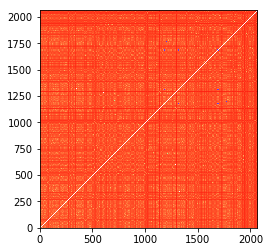

In [32]:
df2 = df.iloc[0:10,0:10]
df2 = df.apply(np.log)
plt.imshow(df2, cmap='rainbow', interpolation='nearest',origin='lower')
plt.show()

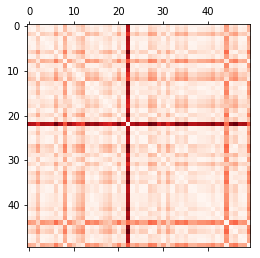

In [33]:
from matplotlib import ticker  

df2 = df.iloc[0:50,0:50]
# alpha = df.columns[0:50]
# print(alpha)
# plt.matshow(df2,cmap=plt.cm.gray_r)
# plt.matshow(df2,cmap='rainbow')
plt.matshow(df2,cmap='Reds')
plt.show()

## attempting kmeans clustering with scikit learn from a DataCamp tutorial 
https://www.datacamp.com/community/tutorials/k-means-clustering-python#case

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [62]:
#X needs to be an array - all of the features minus the feature you are prediting, which you will...
#... have with stocks, but which you do not have with coins
#y can be left out for now, but you'll incorporate it with stocks

X_coins=pd.DataFrame(monthly_coins['4week_ROC'][(monthly_coins['date_as_date']=='2019-01-01')], copy=True)
X_coins=X_coins.values

print(type(X_coins))

#X = X_coins['4week_ROC'].reshape(-1, --1) 
print(X_coins.shape)

X=X_coins

#pre_X=X_coins['4week_ROC']

# X = np.array(train.drop(['Survived'], 1).astype(float))

<class 'numpy.ndarray'>
(2064, 1)


In [ ]:
# X = np.array(train.drop(['Survived'], 1).astype(float))
# y = np.array(train['Survived'])

In [63]:
# kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
# kmeans.fit(X)

kmeans = KMeans(n_clusters=50) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X_coins)
#kmeans.fit(monthly_coins)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

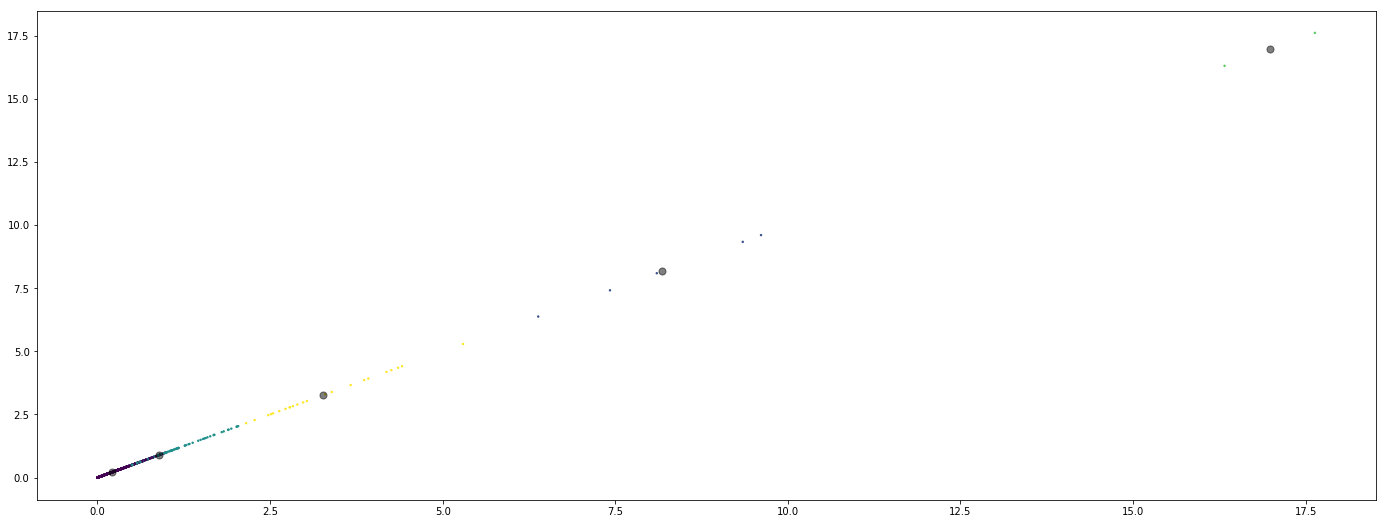

In [104]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_

# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 0], c=y_kmeans, s=2, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 0], c='black', s=50, alpha=0.5);

(0, 1)

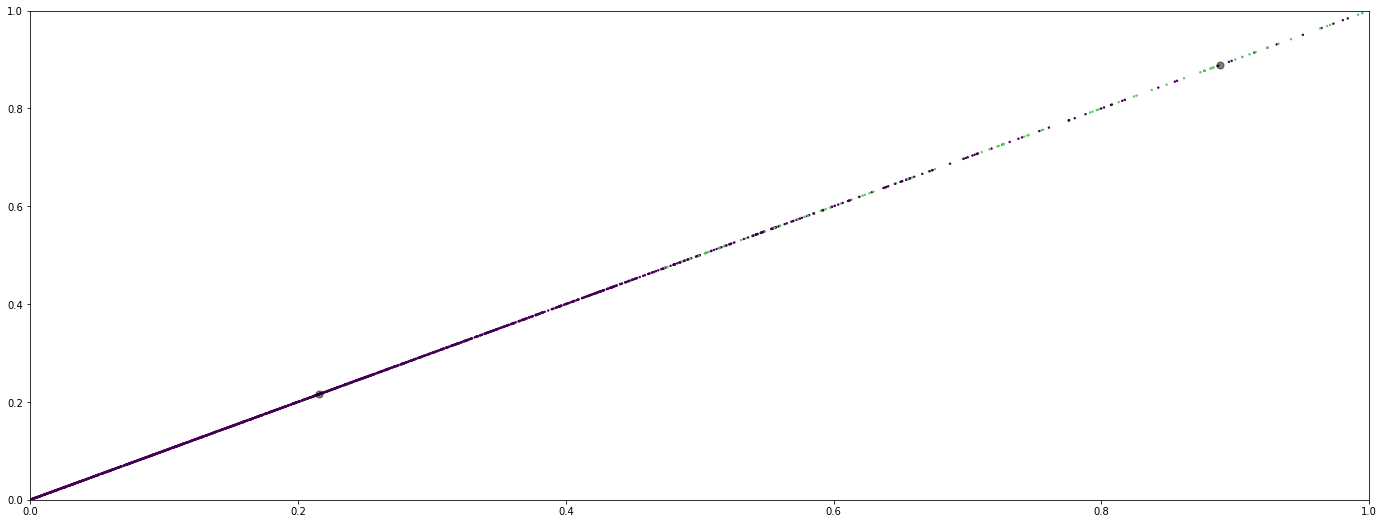

In [103]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 0], c=y_kmeans, s=2, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 0], c='black', s=50, alpha=0.5);

plt.xlim(0, 1)
plt.ylim(0, 1)

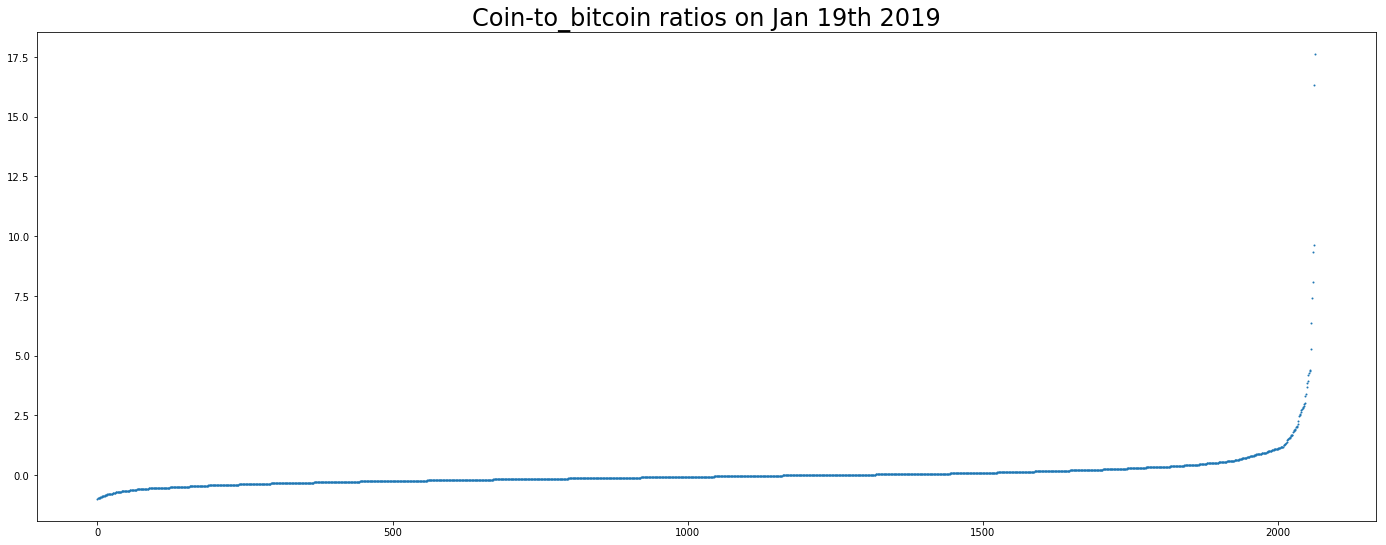

In [40]:
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

#one_day_coins['open'].sort_values().plot(use_index=False)
monthly_coins['4week_ROC'][(monthly_coins['date_as_date']=='2019-01-01')].sort_values().plot(marker='o',markersize=1,linewidth=0,use_index=False)
# plt.ylim()
plt.title('Coin-to-bitcoin ratios on Jan 19th 2019',fontsize=24)
# plt.xlim(2000,2100) 
plt.show()


In [81]:
def kMedoids(D, k, tmax=50): #set cluster number arbitrarily at 50, to match kmeans above
# determine dimensions of distance matrix D
    m, n = D.shape

# randomly initialize an array of k medoid indices
    M = np.sort(np.random.choice(n, k))

# create a copy of the array of medoid indices
    Mnew = np.copy(M)

# initialize a dictionary to represent clusters
    C = {}

    for t in xrange(tmax):
# determine clusters, i.e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

# update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)

# check for convergence
        if np.array_equal(M, Mnew):
            break

        M = np.copy(Mnew)
    else:
# final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

# return result
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [82]:
# mean = np.array([0., 0.])
# Cov = np.array([[1., 0.], [0., 1.]])
# X = rnd.multivariate_normal(mean, Cov, 100).T

# mean = np.array([0., 0.])
# Cov = np.array([[1., 0.], [0., 1.]])
X = dist_matrix

print(X)
print(dist_matrix)
     

[[0.         0.04909274 0.27197087 ... 0.2155087  0.32936163 0.45215457]
 [0.04909274 0.         0.22287814 ... 0.26460144 0.37845436 0.50124731]
 [0.27197087 0.22287814 0.         ... 0.48747957 0.6013325  0.72412544]
 ...
 [0.2155087  0.26460144 0.48747957 ... 0.         0.11385293 0.23664587]
 [0.32936163 0.37845436 0.6013325  ... 0.11385293 0.         0.12279294]
 [0.45215457 0.50124731 0.72412544 ... 0.23664587 0.12279294 0.        ]]
[[0.         0.04909274 0.27197087 ... 0.2155087  0.32936163 0.45215457]
 [0.04909274 0.         0.22287814 ... 0.26460144 0.37845436 0.50124731]
 [0.27197087 0.22287814 0.         ... 0.48747957 0.6013325  0.72412544]
 ...
 [0.2155087  0.26460144 0.48747957 ... 0.         0.11385293 0.23664587]
 [0.32936163 0.37845436 0.6013325  ... 0.11385293 0.         0.12279294]
 [0.45215457 0.50124731 0.72412544 ... 0.23664587 0.12279294 0.        ]]


In [83]:
# mu = np.mean(X, axis=1)

mu = np.mean(X, axis=1)

In [84]:
# import numpy linear algebra module
import numpy.linalg as la
# import scipy spatial module
import scipy.spatial as spt
# import scipy weave module
#import scipy.weave as weave ##not currently available?

def compute_squared_EDM_method1(X):
# determine dimensions of data matrix X
    m,n = X.shape
# initialize squared EDM D
    D = np.zeros((n,n))
# iterate over upper triangle of D
    for i in range(n):
        for j in range(i+1,n):
            D[i,j] = la.norm(X[:,i] - X[:,j])**2
            D[j,i] = D[i,j]
    return D

In [85]:
# D = compute_squared_EDM_method1(X)

D = compute_squared_EDM_method1(X)

In [86]:
j = np.argmin(np.mean(D, axis=1))
me = X[:,j]

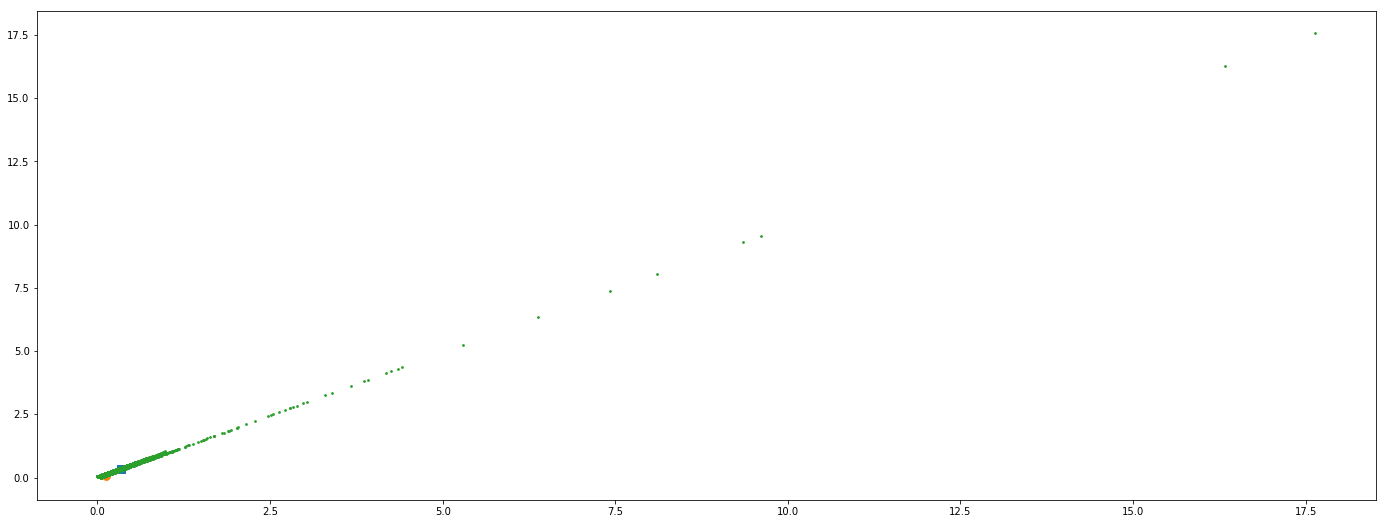

In [87]:
plt.scatter(mu[0], mu[1], marker='s', s=60)
plt.scatter(me[0], me[1], marker='o', s=60)
plt.scatter(X[0,:], X[1,:], s=3)
plt.show()

## Code Bench (code I will need soon, but first make sure I'm on the right path re: 20190124 Maria meeting):

## Simple approach to start - look for covariance over time in x-mean(x) for any metric - raw bitcoin_ratio, open_to_open, raw(er than btc ratio) open, etc.

## Then check the assumptions of your covariance methods to make sure that each of these feeder metrics is meeting those assumptions - start off safe with a Spearman rank correlation

## A major feature here is that you'll be building code that enables those covariance matrices for Rubab's anomaly detection scheme downstream

In [162]:
#1st, need a pair of coins - let's take BCH and ADA, which visually at least strongly covary in coin_to_bitcoin
#use minmax_open (normalized open raw values), because I can visually see that the correlation is good there
#start by generating a distance matrix between all coins that are extant on the last day of sampling: 20190120

import scipy.spatial.distance
from scipy.spatial.distance import pdist, squareform

x = coins.minmax_open.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = coins.minmax_open[(coins['date_as_date']=='2019-01-19')].values
print(x.shape)
print(y.shape) 

#then that np array has to be made 2d before pdist will eat it:
y[:, np.newaxis]

#then calculate a flat distance matrix for it:
distances = pdist(y[:, np.newaxis], metric='euclidean')

#then make that distance matrix square:
dist_matrix = squareform(distances)
print(dist_matrix)

#now go back and make it a pandas df with names running the header and rows:
names = [_ for _ in coins.slug[(coins['date_as_date']=='2019-01-19')]]
df = pd.DataFrame(dist_matrix, index=names, columns=names)
df.to_csv('df.csv', index=True, header=True, sep=' ')
print(df)

#ok, that's going to be SUPER useful for later, when it comes to tracking the changes in these distances...
#... over time as per Rubab's suggestion, but this is actually further than you need to go for k-medoids/k-means

AttributeError: 'DataFrame' object has no attribute 'minmax_open'

In [18]:
#1st, need to generate a column representing the daily deviation from the lifespan mean for each coin
#for now just using its coin_to_bitcoin ratio, but will need to revisit this step for any metric used

def cust_mean(grp):
    grp['mean_coin_to_bitcoin'] = grp['coin_to_bitcoin'].mean()
    return grp

coins = coins.groupby(['slug']).apply(cust_mean)

In [19]:
#omg, did that actually work for all coins?!?
print(coins.shape)
print(coins.dtypes)
print(coins.iloc[2090:2096,[2,17]]) 
print(coins.iloc[-158:-150,[2,17]]) 
#good, it appear to have worked for all coins

(1026980, 18)
slug                            object
symbol                          object
name                            object
date                            object
ranknow                          int64
open                           float64
high                           float64
low                            float64
close                          float64
volume                           int64
market                           int64
close_ratio                    float64
spread                         float64
bitcoin_open                   float64
coin_to_bitcoin                float64
open_to_open                   float64
date_as_date            datetime64[ns]
mean_coin_to_bitcoin           float64
dtype: object
         name  mean_coin_to_bitcoin
2090  Bitcoin               1.00000
2091  Bitcoin               1.00000
2092  Bitcoin               1.00000
2093      XRP               0.00004
2094      XRP               0.00004
2095      XRP               0.00004
          name  me

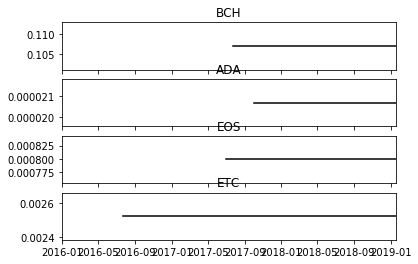

In [20]:
#these mean_coint_to_bitcoin values should be flat over time within each coin:

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['mean_coin_to_bitcoin'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['mean_coin_to_bitcoin'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['mean_coin_to_bitcoin'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['mean_coin_to_bitcoin'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2016-01-01', '2019-01-19') #adjusting start date for better resolution
##plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#yussssss

In [21]:
#ok, but really should normalize each of these coin_to_coin values before going further
#let's try both z-score (x-mean_x)/(stdevx) and also min/max (x-min)/(max_x-min_x) transformations
#to do that, need to generate a few more summary columns for our current focal metric, coin_to_coin:
#min, max, and stdev
def cust_min(grp):
    grp['min_coin_to_bitcoin'] = grp['coin_to_bitcoin'].min()
    return grp
def cust_max(grp):
    grp['max_coin_to_bitcoin'] = grp['coin_to_bitcoin'].max()
    return grp
def cust_stdev(grp):
    grp['stdev_coin_to_bitcoin'] = grp['coin_to_bitcoin'].std()
    return grp

coins = coins.groupby(['slug']).apply(cust_min)
coins = coins.groupby(['slug']).apply(cust_max)
coins = coins.groupby(['slug']).apply(cust_stdev)



In [22]:
#how'd that do?
print(coins.iloc[2090:2096,[2,5,16,17,18,19,20]]) 
print(coins.iloc[-158:-150,[2,5,16,17,18,19,20]]) 
#that worked - I now have the raw ingredients to create those standardized metrics

         name         open date_as_date  mean_coin_to_bitcoin  \
2090  Bitcoin  3651.870000   2019-01-17               1.00000   
2091  Bitcoin  3677.990000   2019-01-18               1.00000   
2092  Bitcoin  3652.380000   2019-01-19               1.00000   
2093      XRP     0.005874   2013-08-04               0.00004   
2094      XRP     0.005875   2013-08-05               0.00004   
2095      XRP     0.005637   2013-08-06               0.00004   

      min_coin_to_bitcoin  max_coin_to_bitcoin  stdev_coin_to_bitcoin  
2090             1.000000             1.000000               0.000000  
2091             1.000000             1.000000               0.000000  
2092             1.000000             1.000000               0.000000  
2093             0.000004             0.000217               0.000034  
2094             0.000004             0.000217               0.000034  
2095             0.000004             0.000217               0.000034  
          name      open date_as_date  m

In [23]:
#now to create those two versiona of a normalized value - the bitcoin_ratio in:
#1) z-score normalization (x-mean_x)/stdev_x
#2) min-max normalization (x-min_x)/(max-min)
#this should work - I think all of the ingredients are contained within the same rows:
coins['z_bitcoin_ratio']=(coins['coin_to_bitcoin']-coins['mean_coin_to_bitcoin'])/coins['stdev_coin_to_bitcoin']
coins['minmax_bitcoin_ratio']=(coins['coin_to_bitcoin']-coins['min_coin_to_bitcoin'])/(coins['max_coin_to_bitcoin']-coins['min_coin_to_bitcoin'])

print(coins.iloc[2090:2096,[2,5,13,14,16,17,18,19,20,21,22]]) 
print(coins.iloc[-158:-150,[2,5,13,14,16,17,18,19,20,21,22]]) 

#I am losing some data here... looks like MIRQ open value is preserved, but end-day bitcoin value is truncated
#... that value exists tho, right?
#no, that value does not exist! for some reason btc only runs through the 19th, MIRQ runs through the 20th
#revisiting the raw data to see if this set started life off this way

         name         open  bitcoin_open  coin_to_bitcoin date_as_date  \
2090  Bitcoin  3651.870000       3651.87         1.000000   2019-01-17   
2091  Bitcoin  3677.990000       3677.99         1.000000   2019-01-18   
2092  Bitcoin  3652.380000       3652.38         1.000000   2019-01-19   
2093      XRP     0.005874        104.95         0.000056   2013-08-04   
2094      XRP     0.005875        105.12         0.000056   2013-08-05   
2095      XRP     0.005637        106.72         0.000053   2013-08-06   

      mean_coin_to_bitcoin  min_coin_to_bitcoin  max_coin_to_bitcoin  \
2090               1.00000             1.000000             1.000000   
2091               1.00000             1.000000             1.000000   
2092               1.00000             1.000000             1.000000   
2093               0.00004             0.000004             0.000217   
2094               0.00004             0.000004             0.000217   
2095               0.00004             0.000004  

In [24]:
#mission: find the end-day bitcoin open values, compare them to what's listed above next to MIRQ
print(os.listdir('/home/cynthiaorourke/Documents/Data'))
rawcoins = pd.read_csv('/home/cynthiaorourke/Documents/Data/full_coins.csv', header = 0)

['wine_data.csv', 'WeekEight2015_18.csv', 'Crunchbase_Startup_Investment_Data.csv', 'coins23.csv', 'headsupwinedata.zip', 'xmr.csv', 'crypto-markets (1).csv', 'cleaned_coins.csv', 'Final2015_18.csv', 'btc.csv', 'full_coins.csv']


In [25]:
#ok, now what do they look like in comparison...
print(rawcoins.columns)
print(rawcoins.iloc[2090:2096,[1,4,6,14]]) 
print(rawcoins.iloc[-158:-150,[1,4,6,14]]) 
print('rawcoins shape=',rawcoins.shape)
print('coins shape=',coins.shape) #there's like 50,000,000
print('the shapes check out - no rows were gained or lost')
#huh... looks like for some reason the bitcoin data for 2019-01-20 did not pull...
#... even though the mirq data did; that is odd but probably not a huge deal?
#ok, anyway, these transformations on dataset "coins" seem to have worked, now visualize them...

Index(['Unnamed: 0', 'slug', 'symbol', 'name', 'date', 'ranknow', 'open',
       'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread',
       'bitcoin_open'],
      dtype='object')
         slug        date         open  bitcoin_open
2090  bitcoin  2019-01-17  3651.870000       3651.87
2091  bitcoin  2019-01-18  3677.990000       3677.99
2092  bitcoin  2019-01-19  3652.380000       3652.38
2093   ripple  2013-08-04     0.005874        104.95
2094   ripple  2013-08-05     0.005875        105.12
2095   ripple  2013-08-06     0.005637        106.72
          slug        date      open  bitcoin_open
1026822   mirq  2019-01-17  0.000074       3651.87
1026823   mirq  2019-01-18  0.000074       3677.99
1026824   mirq  2019-01-19  0.000074       3652.38
1026825   mirq  2019-01-20  0.000074           NaN
1026826  twist  2018-08-20  0.003159       6500.51
1026827  twist  2018-08-21  0.003139       6301.07
1026828  twist  2018-08-22  0.003048       6486.25
1026829  twist  2018-08-2

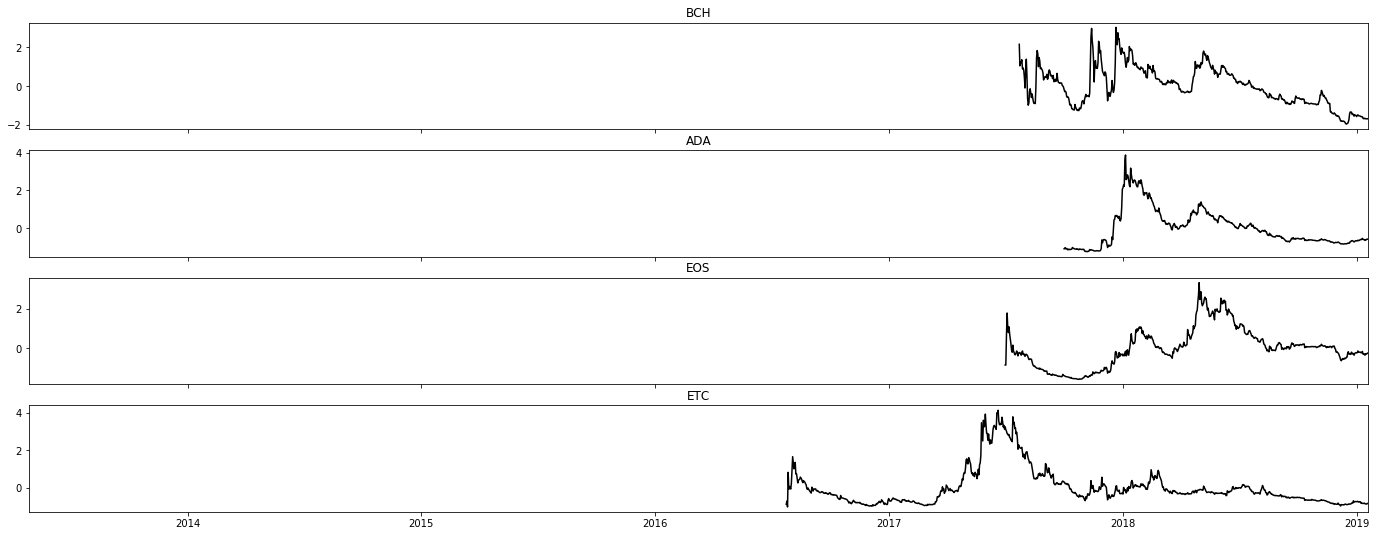

In [26]:
#same as above, but now plotting the z-transformed version of bitcoin_ratio (z_bitcoin_ratio)
#then the min-max transformed version of bitcoin_ratio (minmax_bitcoin_ratio)

width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['z_bitcoin_ratio'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['z_bitcoin_ratio'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['z_bitcoin_ratio'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['z_bitcoin_ratio'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#yes! original patterns (and therefore hopefully correlations) are preserved!
#however, note that the indices are not contrained between coins

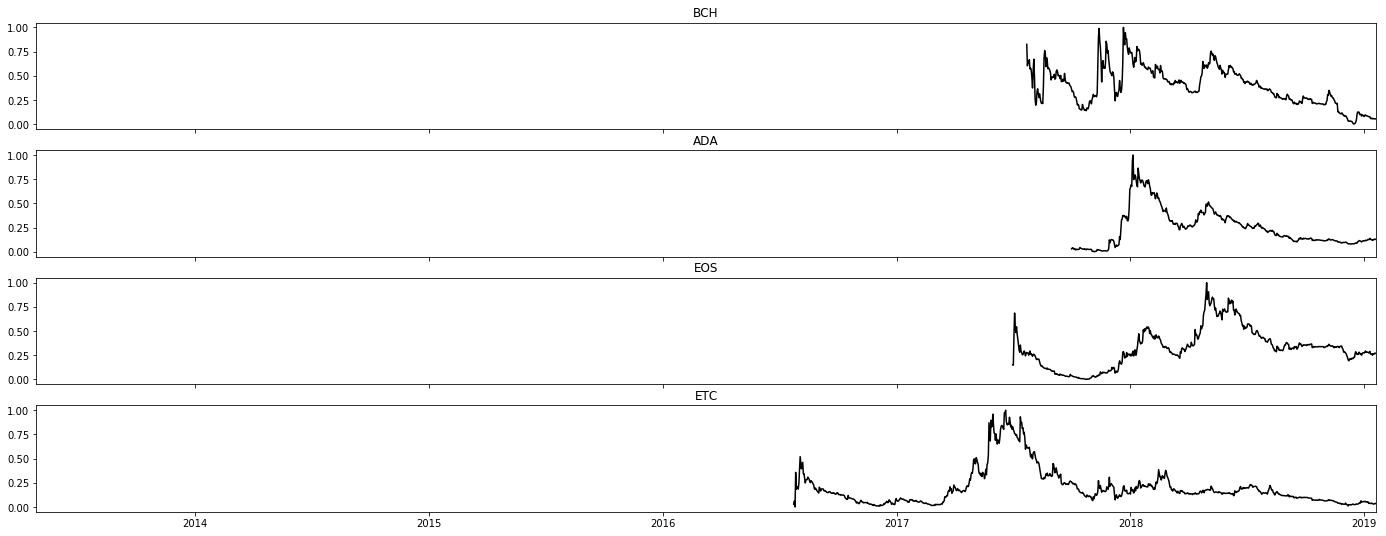

In [27]:
#same as above, but now plotting the z-transformed version of bitcoin_ratio (z_bitcoin_ratio)
#then the min-max transformed version of bitcoin_ratio (minmax_bitcoin_ratio)

width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['minmax_bitcoin_ratio'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['minmax_bitcoin_ratio'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['minmax_bitcoin_ratio'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['minmax_bitcoin_ratio'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#yes! original patterns (and therefore hopefully correlations) are preserved!
#ALSO the indices are now matched between coins - that's super helpful

## Min-Max transformation preserves the original patterns and also standardizes the axes between different coins - probably the best one to go with, but let's run it agains some very raw data - open - as a sanity check

In [28]:
#first will need to generate a min_open and a max_open

def cust_min(grp):
    grp['min_open'] = grp['open'].min()
    return grp
def cust_max(grp):
    grp['max_open'] = grp['open'].max()
    return grp

coins = coins.groupby(['slug']).apply(cust_min)
coins = coins.groupby(['slug']).apply(cust_max)

coins['minmax_open']=(coins['open']-coins['min_open'])/(coins['max_open']-coins['min_open'])


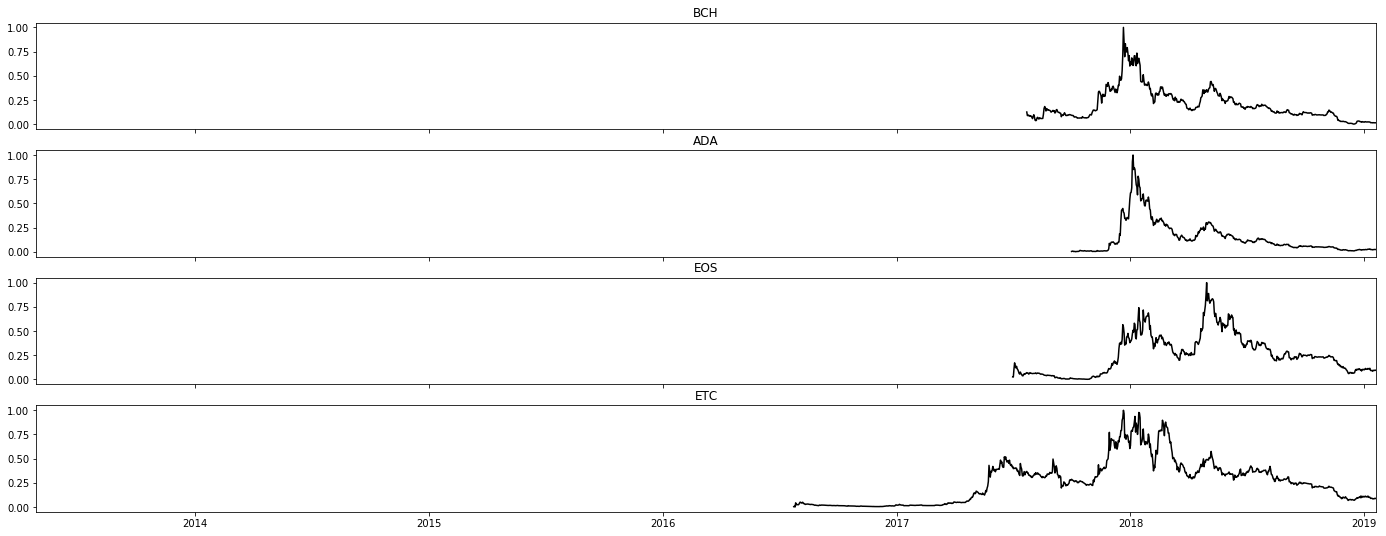

In [29]:
#now plotting min-max of raw open data, as a sanity check

width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

a = 'BCH'
b = 'ADA'
c = 'EOS'
d = 'ETC'

x1=coins['date_as_date'][(coins['symbol'] == a)]
y1=coins['minmax_open'][(coins['symbol'] == a)]

x2=coins['date_as_date'][(coins['symbol'] == b)]
y2=coins['minmax_open'][(coins['symbol'] == b)]

x3=coins['date_as_date'][(coins['symbol'] == c)]
y3=coins['minmax_open'][(coins['symbol'] == c)]

x4=coins['date_as_date'][(coins['symbol'] == d)]
y4=coins['minmax_open'][(coins['symbol'] == d)]

f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x1, y1, c='black')
axarr[0].set_title(a) 
axarr[1].plot(x2, y2, c='black')
axarr[1].set_title(b) 
axarr[2].plot(x3, y3, c='black')
axarr[2].set_title(c) 
axarr[3].plot(x4, y4, c='black')
axarr[3].set_title(d) 

plt.xlim('2013-04-28', '2019-01-19') 
plt.show()

#yes! the patterns are preserved and the axes are standardized - this is exactly what I wanted
#now the distance between two given coins at any point should be comparable to the distance between any...
#... other two coins at that point

## Now that we have a minmax normalization approach, let's look at correlations between coins over the entire time in which they share history - will have to truncate each comparison to be no older than the youngest coin or younger than the first coin to go extinct

In [30]:
#1st, need a pair of coins - let's take BCH and ADA, which visually at least strongly covary in coin_to_bitcoin
#use minmax_open (normalized open raw values), because I can visually see that the correlation is good there
#start by generating a distance matrix between all coins that are extant on the last day of sampling: 20190120

import scipy.spatial.distance
from scipy.spatial.distance import pdist, squareform

x = coins.minmax_open.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = coins.minmax_open[(coins['date_as_date']=='2019-01-19')].values
print(x.shape)
print(y.shape) 

#then that np array has to be made 2d before pdist will eat it:
y[:, np.newaxis]

#then calculate a flat distance matrix for it:
distances = pdist(y[:, np.newaxis], metric='euclidean')

#then make that distance matrix square:
dist_matrix = squareform(distances)
print(dist_matrix)

#now go back and make it a pandas df with names running the header and rows:
names = [_ for _ in coins.slug[(coins['date_as_date']=='2019-01-19')]]
df = pd.DataFrame(dist_matrix, index=names, columns=names)
df.to_csv('df.csv', index=True, header=True, sep=' ')
print(df)

#ok, that's going to be SUPER useful for later, when it comes to tracking the changes in these distances...
#... over time as per Rubab's suggestion, but this is actually further than you need to go for k-medoids/k-means

(1026980,)
(2116,)
[[0.         0.08848708 0.09792772 ... 0.18411149 0.18461787 0.17460836]
 [0.08848708 0.         0.00944064 ... 0.09562441 0.09613079 0.08612128]
 [0.09792772 0.00944064 0.         ... 0.08618377 0.08669015 0.07668065]
 ...
 [0.18411149 0.09562441 0.08618377 ... 0.         0.00050637 0.00950313]
 [0.18461787 0.09613079 0.08669015 ... 0.00050637 0.         0.0100095 ]
 [0.17460836 0.08612128 0.07668065 ... 0.00950313 0.0100095  0.        ]]
                     bitcoin    ripple  ethereum  bitcoin-cash       eos  \
bitcoin             0.000000  0.088487  0.097928      0.171309  0.091169   
ripple              0.088487  0.000000  0.009441      0.082822  0.002682   
ethereum            0.097928  0.009441  0.000000      0.073382  0.006759   
bitcoin-cash        0.171309  0.082822  0.073382      0.000000  0.080140   
eos                 0.091169  0.002682  0.006759      0.080140  0.000000   
tether              0.502222  0.590709  0.600150      0.673532  0.593392   
stell

In [31]:
# import numpy as np
# import random

# def cluster(distances, k=3): #switch that k up via sillouttting later?

#     m = distances.shape[2116] # number of points

#     # Pick k random medoids.
#     curr_medoids = np.array([-1]*k)
#     while not len(np.unique(curr_medoids)) == k:
#         curr_medoids = np.array([random.randint(0, m - 1) for _ in range(k)])
#     old_medoids = np.array([-1]*k) # Doesn't matter what we initialize these to.
#     new_medoids = np.array([-1]*k)
   
#     # Until the medoids stop updating, do the following:
#     while not ((old_medoids == curr_medoids).all()):
#         # Assign each point to cluster with closest medoid.
#         clusters = assign_points_to_clusters(curr_medoids, distances)

#         # Update cluster medoids to be lowest cost point. 
#         for curr_medoid in curr_medoids:
#             cluster = np.where(clusters == curr_medoid)[0]
#             new_medoids[curr_medoids == curr_medoid] = compute_new_medoid(cluster, distances)

#         old_medoids[:] = curr_medoids[:]
#         curr_medoids[:] = new_medoids[:]

#     return clusters, curr_medoids

# def assign_points_to_clusters(medoids, distances):
#     distances_to_medoids = distances[:,medoids]
#     clusters = medoids[np.argmin(distances_to_medoids, axis=1)]
#     clusters[medoids] = medoids
#     return clusters

# def compute_new_medoid(cluster, distances):
#     mask = np.ones(distances.shape)
#     mask[np.ix_(cluster,cluster)] = 0.
#     cluster_distances = np.ma.masked_array(data=distances, mask=mask, fill_value=10e9)
#     costs = cluster_distances.sum(axis=1)
#     return costs.argmin(axis=0, fill_value=10e9)

In [23]:
print(coins[coins['date_as_date']=='2019-01-19'].shape)

(2116, 26)


/home/cynthiaorourke/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/home/cynthiaorourke/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


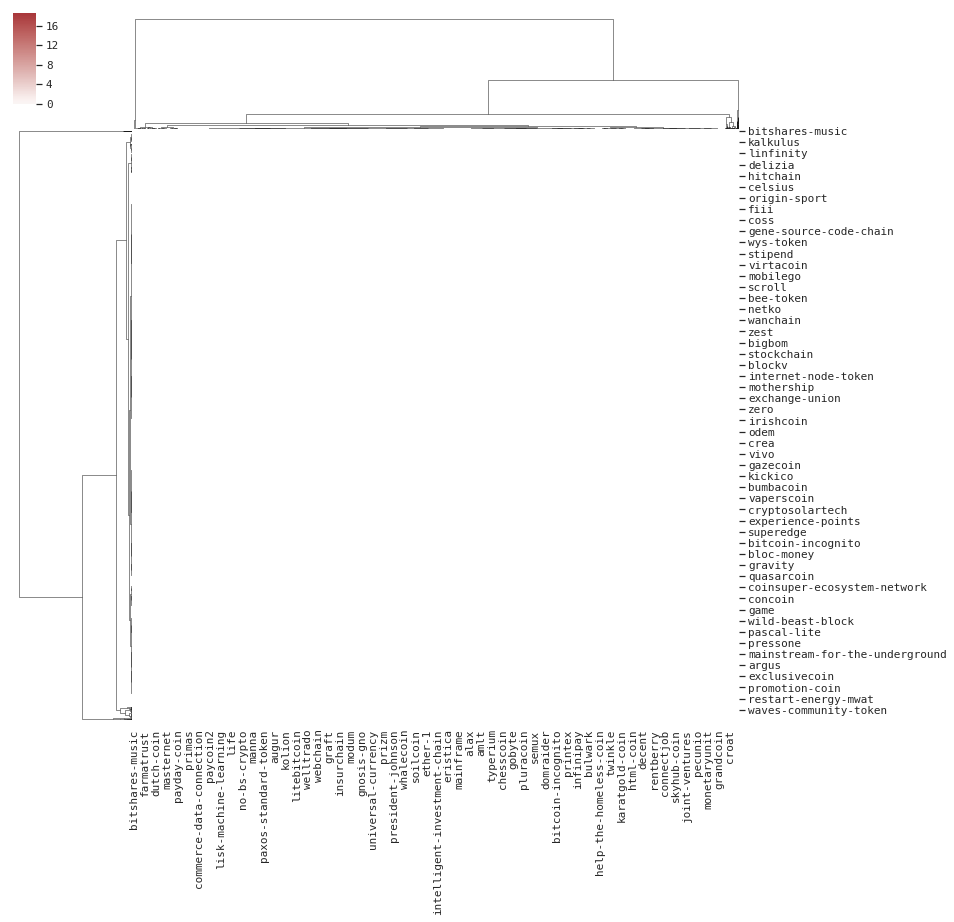

In [293]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.clustermap(df, cmap=cmap)

sns.clustermap(df, center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

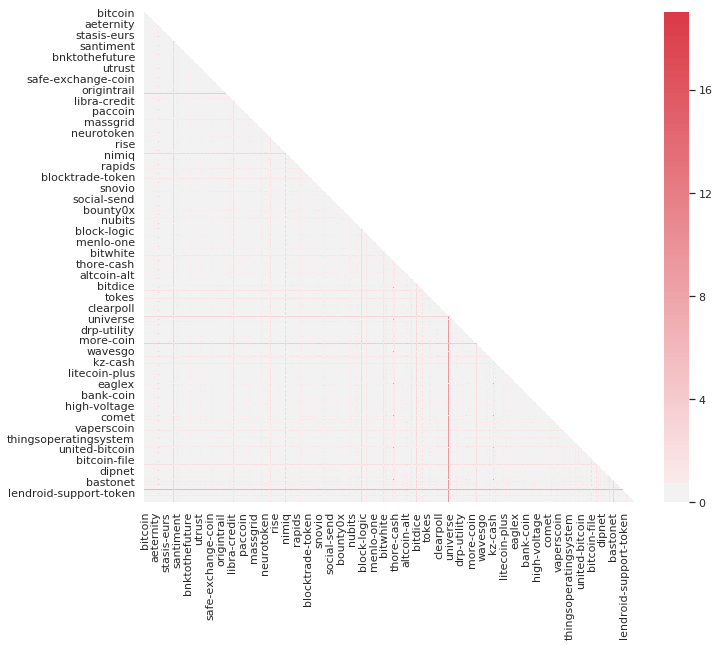

In [260]:
import seaborn as sns
# ax = sns.heatmap(df) #plaid heat map, that's not good - this wasn't a symmetrical distance matrix

sns.set(style="white")

# Compute the correlation matrix - REPLACED WITH DISTANCE MATRIX
corr = df

# Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0.01, vmax=19, center=0,    #0.3 earlier
            square=True)

In [33]:
#k-medoids clustering on just the minmax_open values at this particular point in time:
one_day_coins = coins[coins['date_as_date']=='2019-01-19']
print(one_day_coins.iloc[0:10,:]) #yusssss it worked
#and then to run kmedoids (and then kmeans) on this one-day dataset...

               slug symbol          name        date  ranknow         open  \
2092        bitcoin    BTC       Bitcoin  2019-01-19        1  3652.380000   
4087         ripple    XRP           XRP  2019-01-19        2     0.325702   
5349       ethereum    ETH      Ethereum  2019-01-19        3   121.610000   
5895   bitcoin-cash    BCH  Bitcoin Cash  2019-01-19        4   128.550000   
6463            eos    EOS           EOS  2019-01-19        5     2.470000   
7883         tether   USDT        Tether  2019-01-19        6     1.010000   
9512        stellar    XLM       Stellar  2019-01-19        7     0.106863   
11605      litecoin    LTC      Litecoin  2019-01-19        8    31.480000   
12099          tron    TRX          TRON  2019-01-19        9     0.024770   
12171    bitcoin-sv    BSV    Bitcoin SV  2019-01-19       10    76.130000   

              high          low        close      volume     ...       \
2092   3758.530000  3652.380000  3728.570000  5955691380     ...    

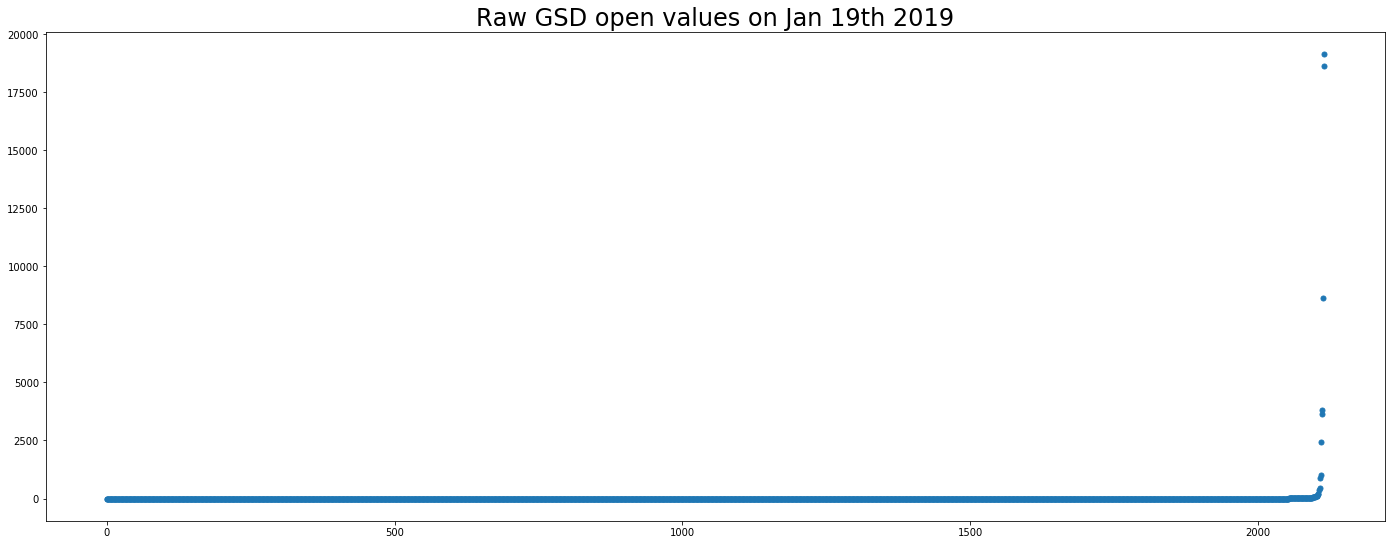

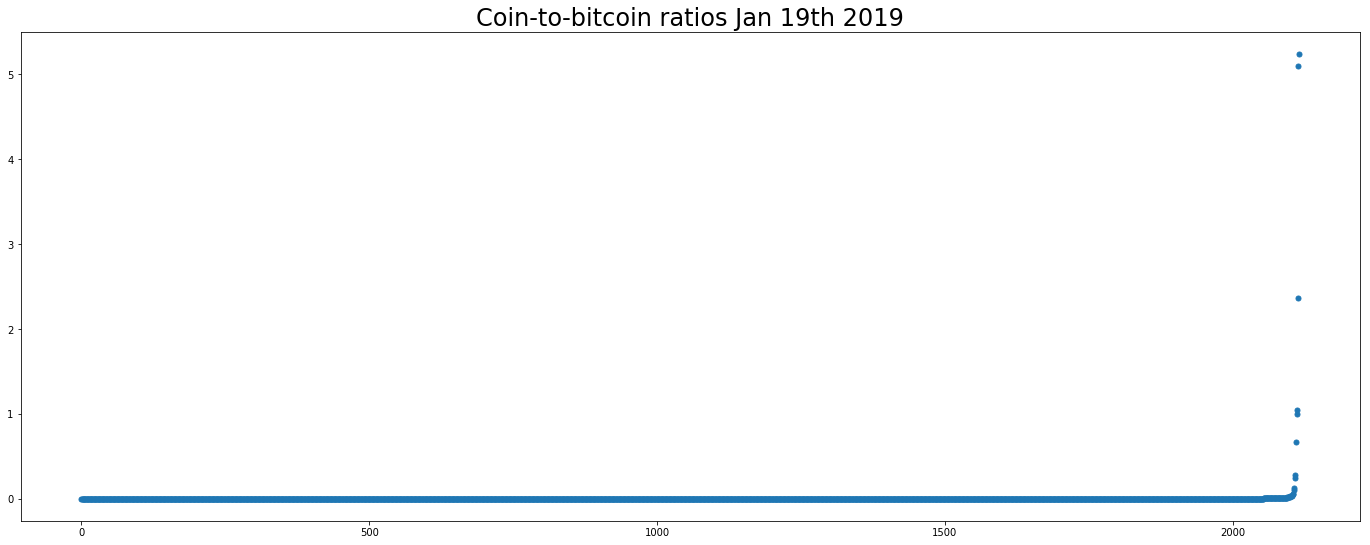

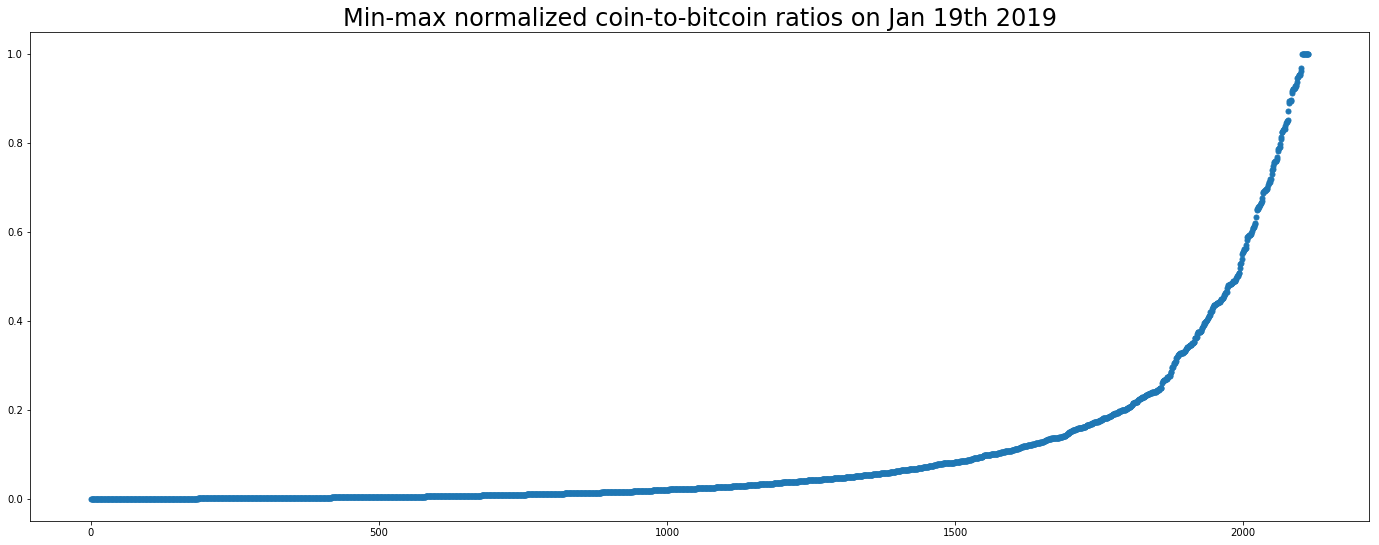

In [38]:
#until I figure out this whole "break the entire notebook" thing, I can at least plot those daily minmax_open...
#... values as a hist to see if there are clear bins (a chunky indication of clusters)

# a = 'open'
# b = 'coin_to_bitcoin'
# c = 'z_bitcoin_ratio'
# d = 'minmax_open'

# y1 = one_day_coins['open']
# y2 = one_day_coins['coin_to_bitcoin']
# y3 = one_day_coins['z_bitcoin_ratio']
# y4 = one_day_coins['minmax_open']

# ts = pd.open(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100))
#one_day_coins['open'].sort_values().plot(use_index=False)
one_day_coins['open'].sort_values().plot(marker='o',markersize=5,linewidth=0,use_index=False)
# plt.xlim(2080,2120) 
plt.title('Raw GSD open values on Jan 19th 2019',fontsize=24)
# plt.xlim(2000,2100) 
plt.show()
one_day_coins['coin_to_bitcoin'].sort_values().plot(marker='o',markersize=5,linewidth=0,use_index=False)
plt.title('Coin-to-bitcoin ratios Jan 19th 2019',fontsize=24)
# plt.xlim(2000,2100) 
plt.show()
one_day_coins['minmax_bitcoin_ratio'].sort_values().plot(marker='o',markersize=5,linewidth=0,use_index=False)
plt.title('Min-max normalized coin-to-bitcoin ratios on Jan 19th 2019',fontsize=24)
# plt.xlim(2000,2100) 
# plt.ylim(0,0.25)
plt.show()

# one_day_coins['open'].sort_values().plot(use_index=False)
# one_day_coins['open'].sort_values().plot(use_index=False)

# f, axarr = plt.subplots(4, sharex=False) #turned sharex off so that each could spread to fill its natural xlims
# axarr[0].scatter(y1,)
# axarr[1].set_title(a) 
# axarr[1].scatter(y2)
# axarr[1].set_title(b) 
# axarr[2].scatter(y3)
# axarr[2].set_title(c)
# axarr[3].scatter(y4)
# axarr[3].set_title(d) 

# # plt.xlim('2013-04-28', '2019-01-19') 
# plt.show()

## Updates from meeting with Maria 20190124

## Focal metric: % momentum - when coin A goes from 10,000:btc to 20,000:btc, does coin B go from 1:btc to 2:btc? 

## Question 1: When does a given altcoin diverge in its steady-state relationship to bitcoin? Under what market regimes? The regime definition is for EC; the dates and nature of divergence pin-pointing is for me.

## Question 2: Given that most altcoins have a steady-state value ratio to bitcoin, which altcoins share their divergence dates from that steady state? Which altcoins covary in altcoin:btc ratio?

## Question 3: Under what market regimes do these divergences happen? Once again, pin-pointing the dates and nature of divergences is for me.

## Question 4: During what periods of time are altcoin clusters themselves disrupted? What do those cluster disruptions look like - cluster dissolution, cluster fragmentation, even cluster tightening? 

## This is where I break the entire notebook:

(Things go real bad.)

In [1]:
# import pyclustering

# from pyclustering.cluster.kmedoids import kmedoids

# # load list of points for cluster analysis
# sample = one_day_coins['minmax_open'].tolist()
# # set random initial medoids
# initial_medoids = [1, 10]
# # create instance of K-Medoids algorithm
# kmedoids_instance = kmedoids(sample, initial_medoids)
# # run cluster analysis and obtain results
# kmedoids_instance.process();
# clusters = kmedoids_instance.get_clusters()
# # show allocated clusters
# print(clusters)

NameError: name 'one_day_coins' is not defined

## Code graveyard:

In [4]:
#following along with this tutorial: 
#https://github.com/lcamposgarrido/data-science_projects/blob/master/others/hierarchical_risk_parity/HRP.ipynb
#first had to pip insall ____ some stuff in the linux terminal

import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
from alpha_vantage.timeseries import TimeSeries
import ffn
import config

In [5]:
# On 20151227 by MLdP <lopezdeprado@lbl.gov>
# Hierarchical Risk Parity


def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp


def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w


def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #dn = sch.dendrogram(link, labels=cov.index.values, label_rotation=90)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

In [12]:
def getMVP(cov):

    cov = cov.T.values
    n = len(cov)
    N = 100
    mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(cov)
    #pbar = opt.matrix(np.mean(returns, axis=1))
    pbar = opt.matrix(np.ones(cov.shape[0]))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))  # negative n x n identity matrix
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S * x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

    return list(wt)

In [13]:
def get_all_portfolios(returns):
    
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    ivp = getIVP(cov)
    ivp = pd.Series(ivp, index=cov.index)
    mvp = getMVP(cov)
    mvp = pd.Series(mvp, index=cov.index)
    
    portfolios = pd.DataFrame([mvp, ivp, hrp], index=['MVP', 'IVP', 'HRP']).T
    
    return portfolios

In [14]:
stocks = {
    "Apple": "AAPL",
    "Amazon": "AMZN",
    "Alphabet": "GOOG",
    "Microsoft": "MSFT",
    "Facebook": "FB",
    "Alibaba": "BABA",
    "Berkshire Hathaway": "BRK-A",
    "Tencent": "TCEHY",
    "JPMorgan": "JPM",
    "ExxonMobil": "XOM",
    "Johnson & Johnson": "JNJ",
    "Samsung Electronics": "005930.KS",
    "Bank of America": "BAC"
}
stocks = pd.DataFrame(list(stocks.items()), columns=['name', 'symbol'])
ts = TimeSeries(key=config.key, output_format='pandas')
stocks_close = pd.DataFrame()
for symbol in stocks.symbol.values:
    data, _ = ts.get_daily(symbol=symbol, outputsize='full')
    close = data['4. close']
    close.index = pd.to_datetime(close.index)
    stocks_close = stocks_close.append(close)
stocks_close = stocks_close.T
stocks_close = stocks_close.sort_index()
stocks_close = stocks_close.fillna(method='ffill')
stocks_close.columns = stocks.name.values
stocks_close = stocks_close["2015-01-01":"2018-01-01"]
returns = stocks_close.to_returns().dropna()

portfolios = get_all_portfolios(returns)

AttributeError: module 'config' has no attribute 'key'

## Following along with this tutorial now: 
https://www.quantopian.com/posts/hierarchical-risk-parity-comparing-various-portfolio-diversification-techniques

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pyfolio as pf
from collections import OrderedDict
import sklearn.covariance

import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [17]:
# helper functions to estimate robust covariance and correlation matrices

def cov2cor(X):
    D = np.zeros_like(X)
    d = np.sqrt(np.diag(X))
    np.fill_diagonal(D, d)
    DInv = np.linalg.inv(D)
    R = np.dot(np.dot(DInv, X), DInv)
    return R

def cov_robust(X):
    oas = sklearn.covariance.OAS()
    oas.fit(X)
    return pd.DataFrame(oas.covariance_, index=X.columns, columns=X.columns)
    
def corr_robust(X):
    cov = cov_robust(X).values
    shrunk_corr = cov2cor(cov)
    return pd.DataFrame(shrunk_corr, index=X.columns, columns=X.columns)

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def mean_variance(returns, cov=None, shrink_means=False):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 50
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    # Convert to cvxopt matrices
    if cov is None:
        S = opt.matrix(np.cov(returns))
    else:
        S = opt.matrix(cov)
    
    if shrink_means:
        pbar = opt.matrix(np.ones(cov.shape[0]))
    else:
        pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt)

def get_mean_variance(returns, cov):
    try: 
        w = mean_variance(returns.values, cov=cov.values)[:, 0]
    except:
        w = np.empty(cov.shape[0])
        w[:] = np.nan
        
    return w

def get_min_variance(returns, cov):
    try: 
        w = mean_variance(returns.values, cov=cov.values, shrink_means=True)[:, 0]
    except:
        w = np.empty(cov.shape[0])
        w[:] = np.nan
        
    return w

def tail_ratio(returns):
    """Determines the ratio between the right (95%) and left tail (5%).
    For example, a ratio of 0.25 means that losses are four times
    as bad as profits.
    Parameters
    ----------
    returns : pd.Series
        Daily returns of the strategy, noncumulative.
         - See full explanation in tears.create_full_tear_sheet.
    Returns
    -------
    float
        tail ratio
    """

    return np.abs(np.percentile(returns, 95)) / \
        np.abs(np.percentile(returns, 5))

In [24]:
#!/usr/bin/env python
# On 20130210, v0.2
# Critical Line Algorithm
# by MLdP <lopezdeprado@lbl.gov>
import numpy as np
#---------------------------------------------------------------
#---------------------------------------------------------------
class CLA:
    def __init__(self,mean,covar,lB,uB):
        # Initialize the class
        if (mean==np.ones(mean.shape)*mean.mean()).all():mean[-1,0]+=1e-5
        self.mean=mean
        self.covar=covar
        self.lB=lB
        self.uB=uB
        self.w=[] # solution
        self.l=[] # lambdas
        self.g=[] # gammas
        self.f=[] # free weights
#---------------------------------------------------------------
    def solve(self):
        # Compute the turning points,free sets and weights
        f,w=self.initAlgo()
        self.w.append(np.copy(w)) # store solution
        self.l.append(None)
        self.g.append(None)
        self.f.append(f[:])
        while True:
            #1) case a): Bound one free weight
            l_in=None
            if len(f)>1:
                covarF,covarFB,meanF,wB=self.getMatrices(f)
                covarF_inv=np.linalg.inv(covarF)
                j=0
                for i in f:
                    l,bi=self.computeLambda(covarF_inv,covarFB,meanF,wB,j,[self.lB[i],self.uB[i]])
                    if l>l_in:l_in,i_in,bi_in=l,i,bi
                    j+=1
            #2) case b): Free one bounded weight
            l_out=None
            if len(f)<self.mean.shape[0]:
                b=self.getB(f)
                for i in b:
                    covarF,covarFB,meanF,wB=self.getMatrices(f+[i])
                    covarF_inv=np.linalg.inv(covarF)
                    l,bi=self.computeLambda(covarF_inv,covarFB,meanF,wB,meanF.shape[0]-1, \
                        self.w[-1][i])
                    if (self.l[-1]==None or l<self.l[-1]) and l>l_out:l_out,i_out=l,i                
            if (l_in==None or l_in<0) and (l_out==None or l_out<0):
                #3) compute minimum variance solution
                self.l.append(0)
                covarF,covarFB,meanF,wB=self.getMatrices(f)
                covarF_inv=np.linalg.inv(covarF)
                meanF=np.zeros(meanF.shape)
            else:
                #4) decide lambda
                if l_in>l_out:
                    self.l.append(l_in)
                    f.remove(i_in)
                    w[i_in]=bi_in # set value at the correct boundary
                else:
                    self.l.append(l_out)
                    f.append(i_out)
                covarF,covarFB,meanF,wB=self.getMatrices(f)
                covarF_inv=np.linalg.inv(covarF)
            #5) compute solution vector
            wF,g=self.computeW(covarF_inv,covarFB,meanF,wB)
            for i in range(len(f)):w[f[i]]=wF[i]
            self.w.append(np.copy(w)) # store solution
            self.g.append(g)
            self.f.append(f[:])
            if self.l[-1]==0:break
        #6) Purge turning points
        self.purgeNumErr(10e-10)
        self.purgeExcess()
#---------------------------------------------------------------   
    def initAlgo(self):
        # Initialize the algo
        #1) Form structured array
        a=np.zeros((self.mean.shape[0]),dtype=[('id',int),('mu',float)])
        b=[self.mean[i][0] for i in range(self.mean.shape[0])] # dump array into list
        a[:]=zip(range(self.mean.shape[0]),b) # fill structured array
        #2) Sort structured array
        b=np.sort(a,order='mu')
        #3) First free weight
        i,w=b.shape[0],np.copy(self.lB)
        while sum(w)<1:
            i-=1
            w[b[i][0]]=self.uB[b[i][0]]
        w[b[i][0]]+=1-sum(w)
        return [b[i][0]],w
#---------------------------------------------------------------    
    def computeBi(self,c,bi):
        if c>0:
            bi=bi[1][0]
        if c<0:
            bi=bi[0][0]
        return bi
#---------------------------------------------------------------
    def computeW(self,covarF_inv,covarFB,meanF,wB):
        #1) compute gamma
        onesF=np.ones(meanF.shape)
        g1=np.dot(np.dot(onesF.T,covarF_inv),meanF)
        g2=np.dot(np.dot(onesF.T,covarF_inv),onesF)
        if wB==None:
            g,w1=float(-self.l[-1]*g1/g2+1/g2),0
        else:
            onesB=np.ones(wB.shape)
            g3=np.dot(onesB.T,wB)
            g4=np.dot(covarF_inv,covarFB)
            w1=np.dot(g4,wB)
            g4=np.dot(onesF.T,w1)
            g=float(-self.l[-1]*g1/g2+(1-g3+g4)/g2)
        #2) compute weights
        w2=np.dot(covarF_inv,onesF)
        w3=np.dot(covarF_inv,meanF)
        return -w1+g*w2+self.l[-1]*w3,g
#---------------------------------------------------------------
    def computeLambda(self,covarF_inv,covarFB,meanF,wB,i,bi):
        #1) C
        onesF=np.ones(meanF.shape)
        c1=np.dot(np.dot(onesF.T,covarF_inv),onesF)
        c2=np.dot(covarF_inv,meanF)
        c3=np.dot(np.dot(onesF.T,covarF_inv),meanF)
        c4=np.dot(covarF_inv,onesF)
        c=-c1*c2[i]+c3*c4[i]
        if c==0:return None,None
        #2) bi
        if type(bi)==list:bi=self.computeBi(c,bi)
        #3) Lambda
        if wB==None:
            # All free assets
            return float((c4[i]-c1*bi)/c),bi
        else:
            onesB=np.ones(wB.shape)
            l1=np.dot(onesB.T,wB)
            l2=np.dot(covarF_inv,covarFB)
            l3=np.dot(l2,wB)
            l2=np.dot(onesF.T,l3)
            return float(((1-l1+l2)*c4[i]-c1*(bi+l3[i]))/c),bi
#---------------------------------------------------------------
    def getMatrices(self,f):
        # Slice covarF,covarFB,covarB,meanF,meanB,wF,wB
        covarF=self.reduceMatrix(self.covar,f,f)
        meanF=self.reduceMatrix(self.mean,f,[0])
        b=self.getB(f)
        covarFB=self.reduceMatrix(self.covar,f,b)
        wB=self.reduceMatrix(self.w[-1],b,[0])
        return covarF,covarFB,meanF,wB
#---------------------------------------------------------------
    def getB(self,f):
        return self.diffLists(range(self.mean.shape[0]),f)
#---------------------------------------------------------------
    def diffLists(self,list1,list2):
        return list(set(list1)-set(list2))
#---------------------------------------------------------------
    def reduceMatrix(self,matrix,listX,listY):
        # Reduce a matrix to the provided list of rows and columns
        matrix = np.asarray(matrix)
        if len(listX)==0 or len(listY)==0:return
        matrix_=matrix[:,listY[0]:listY[0]+1]
        for i in listY[1:]:
            a=matrix[:,i:i+1]
            matrix_=np.append(matrix_,a,1) # gets stuck
        matrix__=matrix_[listX[0]:listX[0]+1,:]
        for i in listX[1:]:
            a=matrix_[i:i+1,:]
            matrix__=np.append(matrix__,a,0)
        return matrix__
#---------------------------------------------------------------    
    def purgeNumErr(self,tol):
        # Purge violations of inequality constraints (associated with ill-conditioned covar matrix)
        i=0
        while True:
            flag=False
            if i==len(self.w):break
            if abs(sum(self.w[i])-1)>tol:
                flag=True
            else:
                for j in range(self.w[i].shape[0]):
                    if self.w[i][j]-self.lB[j]<-tol or self.w[i][j]-self.uB[j]>tol:
                        flag=True;break
            if flag==True:
                del self.w[i]
                del self.l[i]
                del self.g[i]
                del self.f[i]
            else:
                i+=1
        return
#---------------------------------------------------------------   
    def purgeExcess(self):
        # Remove violations of the convex hull
        i,repeat=0,False
        while True:
            if repeat==False:i+=1
            if i==len(self.w)-1:break
            w=self.w[i]
            mu=np.dot(w.T,self.mean)[0,0]
            j,repeat=i+1,False
            while True:
                if j==len(self.w):break
                w=self.w[j]
                mu_=np.dot(w.T,self.mean)[0,0]
                if mu<mu_:
                    del self.w[i]
                    del self.l[i]
                    del self.g[i]
                    del self.f[i]
                    repeat=True
                    break
                else:
                    j+=1
        return
#---------------------------------------------------------------
    def getMinVar(self):
        # Get the minimum variance solution
        var=[]
        for w in self.w:
            a=np.dot(np.dot(w.T,self.covar),w)
            var.append(a)
        return min(var)**.5,self.w[var.index(min(var))]
#---------------------------------------------------------------
    def getMaxSR(self):
        # Get the max Sharpe ratio portfolio
        #1) Compute the local max SR portfolio between any two neighbor turning points
        w_sr,sr=[],[]
        for i in range(len(self.w)-1):
            w0=np.copy(self.w[i])
            w1=np.copy(self.w[i+1])
            kargs={'minimum':False,'args':(w0,w1)}
            a,b=self.goldenSection(self.evalSR,0,1,**kargs)
            w_sr.append(a*w0+(1-a)*w1)
            sr.append(b)
        return max(sr),w_sr[sr.index(max(sr))]
#---------------------------------------------------------------
    def evalSR(self,a,w0,w1):
        # Evaluate SR of the portfolio within the convex combination
        w=a*w0+(1-a)*w1
        b=np.dot(w.T,self.mean)[0,0]
        c=np.dot(np.dot(w.T,self.covar),w)[0,0]**.5
        return b/c
#---------------------------------------------------------------
    def goldenSection(self,obj,a,b,**kargs):
        # Golden section method. Maximum if kargs['minimum']==False is passed 
        from math import log,ceil
        tol,sign,args=1.0e-9,1,None
        if 'minimum' in kargs and kargs['minimum']==False:sign=-1
        if 'args' in kargs:args=kargs['args']
        numIter=int(ceil(-2.078087*log(tol/abs(b-a))))
        r=0.618033989
        c=1.0-r
        # Initialize
        x1=r*a+c*b;x2=c*a+r*b
        f1=sign*obj(x1,*args);f2=sign*obj(x2,*args)
        # Loop
        for i in range(numIter):
            if f1>f2:
                a=x1
                x1=x2;f1=f2
                x2=c*a+r*b;f2=sign*obj(x2,*args)
            else:
                b=x2
                x2=x1;f2=f1
                x1=r*a+c*b;f1=sign*obj(x1,*args)
        if f1<f2:return x1,sign*f1
        else:return x2,sign*f2
#---------------------------------------------------------------
    def efFrontier(self,points):
        # Get the efficient frontier
        mu,sigma,weights=[],[],[]
        a=np.linspace(0,1,points/len(self.w))[:-1] # remove the 1, to avoid duplications
        b=range(len(self.w)-1)
        for i in b:
            w0,w1=self.w[i],self.w[i+1]
            if i==b[-1]:a=np.linspace(0,1,points/len(self.w)) # include the 1 in the last iteration
            for j in a:
                w=w1*j+(1-j)*w0
                weights.append(np.copy(w))
                mu.append(np.dot(w.T,self.mean)[0,0])
                sigma.append(np.dot(np.dot(w.T,self.covar),w)[0,0]**.5)
        return mu,sigma,weights
#---------------------------------------------------------------
#---------------------------------------------------------------

In [27]:
import scipy.cluster.hierarchy as sch
import random
import numpy as np
import pandas as pd

def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index

    return sortIx.tolist()

def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) / 2),
                                                      (len(i) / 2, len(i))) if len(i) > 1]  # bi-section
        for i in xrange(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

def generateData(nObs, sLength, size0, size1, mu0, sigma0, sigma1F):
    # Time series of correlated variables
    # 1) generate random uncorrelated data
    x = np.random.normal(mu0, sigma0, size=(nObs, size0))
    # each row is a variable
    # 2) create correlation between the variables
    cols = [random.randint(0, size0 - 1) for i in xrange(size1)]
    y = x[:, cols] + np.random.normal(0, sigma0 * sigma1F, size=(nObs, len(cols)))
    x = np.append(x, y, axis=1)
    # 3) add common random shock
    point = np.random.randint(sLength, nObs - 1, size=2)
    x[np.ix_(point, [cols[0], size0])] = np.array([[-.5, -.5], [2, 2]])
    # 4) add specific random shock
    point = np.random.randint(sLength, nObs - 1, size=2)

    x[point, cols[-1]] = np.array([-.5, 2])

    return x, cols

def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    corr, cov = pd.DataFrame(corr), pd.DataFrame(cov)
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    # recover labels
    hrp = getRecBipart(cov, sortIx)

    return hrp.sort_index()


def getCLA(cov, **kargs):
    # Compute CLA's minimum variance portfolio
    mean = np.arange(cov.shape[0]).reshape(-1, 1)
    # Not used by C portf
    lB = np.zeros(mean.shape)
    uB = np.ones(mean.shape)
    cla = CLA(mean, cov, lB, uB)
    cla.solve()
    return cla.w[-1].flatten()

def hrpMC(numIters=10000, nObs=520, size0=5, size1=5, mu0=0, sigma0=1e-2,
          sigma1F=.25, sLength=260, rebal=22):
    # Monte Carlo experiment on HRP
    methods = {'getHRP': getHRP, 'getIVP': getIVP, 'getCLA': getCLA}
    stats = {k: pd.Series() for k in methods.keys()}
    
    pointers = range(sLength, nObs, rebal)
    for numIter in xrange(int(numIters)):
        # print numIter
        # 1) Prepare data for one experiment
        x, cols = generateData(nObs, sLength, size0,
                               size1, mu0, sigma0, sigma1F)
        r = pd.DataFrame(columns=[methods.keys()],
                         index=range(sLength, nObs))#{i.__name__: pd.Series() for i in methods}
        #print r
        # 2) Compute portfolios in-sample
        for pointer in pointers:
            x_ = x[pointer - sLength:pointer]
            cov_ = np.cov(x_, rowvar=0)
            corr_ = np.corrcoef(x_, rowvar=0)
            # 3) Compute performance out-of-sample
            x_ = x[pointer:pointer + rebal]
            for name, func in methods.iteritems():
                w_ = func(cov=cov_, corr=corr_)
                # callback
                #r_ = pd.Series(np.dot(x_, w_))
                #print r[name].append(r_)
                #print pointer
                r.loc[pointer:pointer + rebal - 1, name] = np.dot(x_, w_)
                
        # 4) Evaluate and store results
        for name, func in methods.iteritems():
            r_ = r[name].reset_index(drop=True)
            p_ = (1 + r_).cumprod()
            stats[name].loc[numIter] = p_.iloc[-1] - 1  # terminal return
            
    # 5) Report results
    stats = pd.DataFrame.from_dict(stats, orient='columns')
    # stats.to_csv('stats.csv')
    df0, df1 = stats.std(), stats.var()
    print (pd.concat([df0, df1, df1 / df1['getHRP'] - 1], axis=1)) #I added extra parentheses here to clear a syntax error - hope I didn't break anything
    return stats

In [37]:
#create rets in R dplyr
#will once again need to go back and change the date_as_date object to time format
#first randomly select 23 symbols - specifying that they should all be extant as of the creation of coins
for i in range(23):
    x=np.random.choice(coins['symbol'][(coins['date']=='2019-01-19')&(coins['coin_to_bitcoin']>0)]) 
    print(x)
    print(coins['coin_to_bitcoin'][(coins['date']=='2019-01-19')&(coins['symbol']==x)])
#ok, that worked - each of these coins is extant and worth at least some btc ratio
#list is: VSX, BCH, DEEX, BLUE, VULC, XWC, KUN, BTK, XMO, BRX, STQ, DRG, BETHER, MOAC, NEO, HVCO, GOT, NYEX,...
#... AE, MLN, MIR, BND, ONG

VSX
673735    3.800262e-07
Name: coin_to_bitcoin, dtype: float64
BCH
5895    0.035196
Name: coin_to_bitcoin, dtype: float64
DEEX
970267    0.000005
Name: coin_to_bitcoin, dtype: float64
BLUE
387397    0.000005
Name: coin_to_bitcoin, dtype: float64
VULC
582428    0.000001
Name: coin_to_bitcoin, dtype: float64
XWC
157469    0.000009
Name: coin_to_bitcoin, dtype: float64
KUN
504796    0.001577
Name: coin_to_bitcoin, dtype: float64
BTK
488644    3.011735e-09
Name: coin_to_bitcoin, dtype: float64
XMO
992849    0.000116
Name: coin_to_bitcoin, dtype: float64
BRX
566709    0.000033
Name: coin_to_bitcoin, dtype: float64
STQ
247867    1.065059e-07
Name: coin_to_bitcoin, dtype: float64
DRG
964442    0.00001
Name: coin_to_bitcoin, dtype: float64
BETHER
434022    4.301305e-07
Name: coin_to_bitcoin, dtype: float64
MOAC
72469    0.000145
Name: coin_to_bitcoin, dtype: float64
NEO
19535    0.002114
Name: coin_to_bitcoin, dtype: float64
HVCO
868925    0.000003
Name: coin_to_bitcoin, dtype: float64
GOT
3

In [ ]:
# R code for extracting a usable 23-coin dataset in dplyr:
# library(dplyr)
# cleaned_coins <- read.csv("~/Documents/Data/cleaned_coins.csv")
# coins23<-cleaned_coins%>%filter(symbol %in% c('VSX', 'BCH', 'DEEX', 'BLUE', 'VULC', 'XWC', 'KUN', 'BTK', 'XMO', 'BRX', 'STQ', 'DRG', 'BETHER', 'MOAC', 'NEO', 'HVCO', 'GOT', 'NYEX', 'AE', 'MLN', 'MIR', 'BND', 'ONG'))
# coins23 <- droplevels(coins23)
# levels(coins23$symbol)
# lastprices<-coins23%>%filter(date=='2019-01-19')
# View(lastprices) #turns out some symbols are duplicates - filtered out first instance of each
# coins23<-coins23%>%filter(slug!='ongsocial')%>%filter(slug!='gonetwork')
# names(coins23)[names(coins23) == "coin_to_bitcoin"] <- "price"
# names(coins23)[names(coins23) == "slug"] <- "symbols"
# write.csv(coins23, file = "/home/cynthiaorourke/Documents/Data/coins23.csv")

## PICK BACK UP HERE

In [40]:
ret = pd.read_csv('/home/cynthiaorourke/Documents/Data/coins23.csv', header = 0)
list(ret)
print('looks like we gained an extra index row in dplyr')
print(ret.iloc[0:10,:])

looks like we gained an extra index row in dplyr
   Unnamed: 0     X       symbols symbol          name        date  ranknow  \
0           1  5350  bitcoin-cash    BCH  Bitcoin Cash  2017-07-23        4   
1           2  5351  bitcoin-cash    BCH  Bitcoin Cash  2017-07-24        4   
2           3  5352  bitcoin-cash    BCH  Bitcoin Cash  2017-07-25        4   
3           4  5353  bitcoin-cash    BCH  Bitcoin Cash  2017-07-26        4   
4           5  5354  bitcoin-cash    BCH  Bitcoin Cash  2017-07-27        4   
5           6  5355  bitcoin-cash    BCH  Bitcoin Cash  2017-07-28        4   
6           7  5356  bitcoin-cash    BCH  Bitcoin Cash  2017-07-29        4   
7           8  5357  bitcoin-cash    BCH  Bitcoin Cash  2017-07-30        4   
8           9  5358  bitcoin-cash    BCH  Bitcoin Cash  2017-07-31        4   
9          10  5359  bitcoin-cash    BCH  Bitcoin Cash  2017-08-01        4   

     open    high     low   close      volume      market  close_ratio  \
0  555.

In [ ]:
symbols = [u'GDC', u'THC', u'QTUM', u'XEM', u'GAME', u'VTA', u'FAIR', 
           u'EWU', u'XLB', u'XLE', u'XLF', u'LQD', u'XLK', u'XLU', 
           u'EPP', u'FXI', u'VGK', u'VPL', u'SPY', u'TLT', u'BND', 
           u'CSJ', u'DIA']

In [28]:
symbols = [u'EEM', u'EWG', u'TIP', u'EWJ', u'EFA', u'IEF', u'EWQ', 
           u'EWU', u'XLB', u'XLE', u'XLF', u'LQD', u'XLK', u'XLU', 
           u'EPP', u'FXI', u'VGK', u'VPL', u'SPY', u'TLT', u'BND', 
           u'CSJ', u'DIA']
rets = (get_pricing(symbols, #'slug' -> 'symbols' rets will need to be replaced with coins (slug not symbol because of duplicate symbols in coins)
                    fields='price', #'price' -> 'coin_to_bitcoin'
                    start_date='2008-1-1', #will need to toggle start date
                    end_date='2016-7-1', #will need to toggle end date
                   )
        .pct_change()#this calls on the percent change of the prices for these stocks at these times
        .rename(columns=lambda x: x.symbol) #then this renames each column with variable.symbol
)

NameError: name 'get_pricing' is not defined

In [ ]:
# There has to be a more succinct way to do this using rolling_apply or resample
# Would love to see a better version of this.
eoms = rets.resample('1BM').index[13:-1]
covs = pd.Panel(items=eoms, minor_axis=rets.columns, major_axis=rets.columns)
corrs = pd.Panel(items=eoms, minor_axis=rets.columns, major_axis=rets.columns)
covs_robust = pd.Panel(items=eoms, minor_axis=rets.columns, major_axis=rets.columns)
corrs_robust = pd.Panel(items=eoms, minor_axis=rets.columns, major_axis=rets.columns)
for eom in eoms:
    rets_slice = rets.loc[eom-pd.Timedelta('252d'):eom]
    covs.loc[eom] = rets_slice.cov()
    corrs.loc[eom] = rets_slice.corr()
    covs_robust.loc[eom] = cov_robust(rets_slice)
    corrs_robust.loc[eom] = corr_robust(rets_slice)